# Tools

## Data preprocessing

Load a month of monthly Neighborhood Patterns, then prepare data for IPF.

In [1]:
%load_ext autoreload
%autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas()

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import Advan_operator as ad_op  

pd.set_option('display.max_columns', None)

### Load monthly Neighborhood Patterns

#### Asign file locations

In [17]:
data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo


# data_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Dell 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Dell
# ACS_file = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"

# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Lenovo
# ACS_file = r"F:\Research\Wild_fire\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"F:\SafeGraph\Advan_2023_API\Monthly_Patterns_home_panel_summary\Monthly_Patterns_home_panel_summary_2019_2023.csv"

# 2018 desktop
# save_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # 2018 desktop
save_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel_2018'  # 2018 desktop
# data_dir = r'D:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'  
data_dir = r'D:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'    
ACS_file = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
home_panel_fname = f"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
# home_panel_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\home_panel_summary_2019_2023_restated_20240119.csv.gz"  ## large change!!!
# https://community.deweydata.io/t/residing-device-count-in-2023-07-and-2023-08-surged-abnomorally/26675/15
CBG_2019_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"



year = '2023'
month = 6




month_dir = os.path.join(data_dir, str(year), f'{month:02}', '01')
no_dict_colum_fname = os.path.join(save_dir, f"NP_dict_column_{year}_{month:02}.csv")
device_home_areas_fname = os.path.join(save_dir, f"NP_split_device_home_areas_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_CBG_fname     = os.path.join(save_dir, f"adjusted_dwelling_time_stop_CBG_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_natinol_fname = os.path.join(save_dir, f"adjusted_dwelling_time_stop_natinol_{year}_{month:02}.csv")
person_per_device_fname = os.path.join(save_dir, f"person_per_device_{year}_{month:02}.csv")
restored_CBG_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_CBG_{year}_{month:02}.csv")
restored_target_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_target_{year}_{month:02}.csv")
CBG_device_stop_destination_distribution_fname  = os.path.join(save_dir, f"CBG_device_stop_destination_distribution_{year}_{month:02}.csv")
CBG_device_stop_origin_distribution_fname = os.path.join(save_dir, f"CBG_device_stop_origin_distribution_{year}_{month:02}.csv")
IPF_results_fname = os.path.join(save_dir, f"IPF_origin_outgoer_hourly_{year}{month:02}.csv")
CBG_hourly_population_fname = os.path.join(save_dir, f"CBG_population_hourly_{year}{month:02}.csv")

CBG_origin_outbound_distribution_sampling_rate_fname = os.path.join(save_dir, f"CBG_origin_outbound_distribution_sampling_rate_{year}{month:02}.csv")
CBG_destination_inbound_per_device_fname = os.path.join(save_dir, f"CBG_destination_inbound_per_device_{year}{month:02}.csv")

CBG_destination_inbound_fname = os.path.join(save_dir, f"CBG_destination_inbound_{year}{month:02}.csv")
inbound_hourly_df_fname = os.path.join(save_dir, f"inbound_hourly_{year}{month:02}.csv")
CBG_agregated_inbound_fname =  os.path.join(save_dir, f"CBG_agregated_inbound_{year}{month:02}.csv")
hourly_agregated_inbound_fname =  os.path.join(save_dir, f"hourly_agregated_inbound_{year}{month:02}.csv")

 
# month_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01'
# CBG_list_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG_list.csv"

sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'


print("Month directory:", month_dir)
print("Save_dir directory:", save_dir)
print("ACS_file:", ACS_file)
print("home_panel file name:", home_panel_fname)

print("No dict colum file name:", no_dict_colum_fname)
print("Device home areas file name:", device_home_areas_fname)
print("Device person_per_device file name:", person_per_device_fname)


print("Device adjusted_dwelling_time_stop_CBG_fname:", adjusted_dwelling_time_stop_CBG_fname)
print("Device adjusted_dwelling_time_stop_natinol_fname:", adjusted_dwelling_time_stop_natinol_fname)

print("Restored_hourly_vistor_count_CBG file name:   ", restored_CBG_hourly_vistor_count_fname)
print("Restored_hourly_vistor_count_target file name:", restored_target_hourly_vistor_count_fname)

print("CBG_device_stop_destination_distribution file name:   ", CBG_device_stop_destination_distribution_fname)
print("CBG_device_stop_origin_distribution file name:", CBG_device_stop_origin_distribution_fname)

print("IPF_results file name:", IPF_results_fname)
print("CBG hourly population file name:", CBG_hourly_population_fname)

print("CBG_origin_outbound_distribution_sampling_rate file name:", CBG_origin_outbound_distribution_sampling_rate_fname)


Month directory: F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\09\01
Save_dir directory: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test
ACS_file: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv
home_panel file name: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip
No dict colum file name: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\NP_dict_column_2023_09.csv
Device home areas file name: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\NP_split_device_home_areas_2023_09.csv
Device person_per_device file name: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\person_per_device_2023_09.csv
Device adj

## Load monthly neighborhood patterns

In [6]:
use_cols =  ['AREA', 
             "DEVICE_HOME_AREAS",
            "STOPS_BY_DAY", 
            "RAW_STOP_COUNTS", 
            "RAW_DEVICE_COUNTS", 
            "MEDIAN_DWELL", 
            "STOPS_BY_EACH_HOUR"]
month_df = ad_op.load_neighborhood_monthly_folder(folder=month_dir, extions=['gz'], use_cols=use_cols, verbose=True)
month_df = month_df.sort_values("AREA")
month_df['AREA'] = month_df['AREA'].astype(str).str.zfill(12)
month_df = month_df[use_cols]
month_df

Found target files: 20
The top 5 and bottom 5 files:
F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\09\01\Neighborhood_Patterns_US-0-DATE_RANGE_START-2023-09-01.csv.gz
F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\09\01\Neighborhood_Patterns_US-1-DATE_RANGE_START-2023-09-01.csv.gz
F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\09\01\Neighborhood_Patterns_US-2-DATE_RANGE_START-2023-09-01.csv.gz
F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\09\01\Neighborhood_Patterns_US-3-DATE_RANGE_START-2023-09-01.csv.gz
F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\09\01\Neighborhood_Patterns_US-34-DATE_RANGE_START-2023-09-01.csv.gz
...
F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\09\01\Neighborhood_Patterns_US-5-DATE_RANGE_START-2023-09-01.csv.gz
F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\09\01\Neighborhood_Patterns_US-6-DATE_RANGE_START-2023-09-01.csv.gz
F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\09\01\Neighborhood_Pattern

AREA                                  DEVICE_HOME_AREAS  \
8020   010010201001  {"010010208012":155,"010010201001":107,"010010...   
15927  010010201001  {"010010208012":155,"010010201001":107,"010010...   
14248  010010201002  {"010010201002":90,"010010205002":21,"01001020...   
15395  010010201002  {"010010201002":90,"010010205002":21,"01001020...   
19751  010010202001  {"010010202001":157,"010010205003":67,"0100102...   
...             ...                                                ...   
53     780309612001  {"780309608001":22,"780309611001":21,"78030961...   
1015   780309612002  {"780309611002":36,"780309608001":36,"78030961...   
18168  780309612002  {"780309611002":36,"780309608001":36,"78030961...   
16841  780309900000  {"780309608001":4,"780309611001":4,"7802095020...   
1819   780309900000  {"780309608001":4,"780309611001":4,"7802095020...   

                                            STOPS_BY_DAY  RAW_STOP_COUNTS  \
8020   [263,132,188,195,444,592,610,748,403,174,919,5...            12747   
15927  [263,132,188,195,444,592,610,748,403,174,919,5...            12747   
14248  [309,92,115,157,173,462,191,246,131,96,266,132...             5858   
15395  [309,92,115,157,173,462,191,246,131,96,266,132...             5858   
19751  [799,115,211,148,575,636,653,477,215,416,560,7...            16397   
...                                                  ...              ...   
53     [74,36,40,49,47,48,55,72,37,36,53,35,69,46,39,...             1493   
1015   [192,176,98,186,321,408,457,287,240,149,258,26...             7609   
18168  [192,176,98,186,321,408,457,287,240,149,258,26...             7609   
16841  [33,29,50,44,34,53,51,7,0,2,29,15,41,28,13,50,...             1003   
1819   [33,29,50,44,34,53,51,7,0,2,29,15,41,28,13,50,...             1003   

       RAW_DEVICE_COUNTS  MEDIAN_DWELL  \
8020                2929      7.966667   
15927               2929      7.966667   
14248               1176     42.433333   
15395               1176     42.433333   
19751               2092      6.516667   
...                  ...           ...   
53                   460     44.166667   
1015                1753      7.966667   
18168               1753      7.966667   
16841                311      1.666667   
1819                 311      1.666667   

                                      STOPS_BY_EACH_HOUR  
8020   [0,0,0,0,0,0,53,18,0,0,19,0,40,0,0,57,41,0,0,4...  
15927  [0,0,0,0,0,0,53,18,0,0,19,0,40,0,0,57,41,0,0,4...  
14248  [0,0,0,0,0,0,22,19,0,22,0,35,19,43,22,35,33,0,...  
15395  [0,0,0,0,0,0,22,19,0,22,0,35,19,43,22,35,33,0,...  
19751  [0,0,0,0,0,22,99,77,151,117,57,15,18,19,33,81,...  
...                                                  ...  
53     [-2,0,0,1,0,0,8,3,-3,5,18,0,0,0,1,2,5,3,-4,2,1...  
1015   [3,0,0,0,0,6,13,9,6,11,15,3,13,14,12,3,8,15,10...  
18168  [3,0,0,0,0,6,13,9,6,11,15,3,13,14,12,3,8,15,10...  
16841  [0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,5,21,0,0,0,...  
1819   [0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,5,21,0,0,0,...  

[441366 rows x 7 columns]

In [10]:
print("RAW_STOP_COUNTS (billion):", month_df['RAW_STOP_COUNTS'].sum() / 1000000000)

RAW_STOP_COUNTS (billion): 8.45208847


## Check the total of the hourly stops

Usually are 98.9% of the sum of STOPS_BY_EACH_HOUR column

In [11]:
def _get_total_hourly_stop(row):
    # print(row)
    hourly_stop = json.loads(row['STOPS_BY_EACH_HOUR'])
    total_stop = sum(hourly_stop)
    return total_stop

month_df['total_hourly_stop'] = month_df.iloc[:].apply(_get_total_hourly_stop, axis=1)
ratio = month_df['total_hourly_stop'].sum() / month_df['RAW_STOP_COUNTS'].sum()

print("Ratio: total_hourly_stop / RAW_STOP_COUNTS = ", ratio)

# the total_hourly_stop is smaller than the RAW_STOP_COUNTS (98.9%)

Ratio: total_hourly_stop / RAW_STOP_COUNTS =  0.9891879427996569


## Adjust the RAW_STOP_COUNTS by dwellling_time

If a stop dwelling > 60 minutes, we add a stop to the next hours. 

May increase 25% stops.

In [12]:
non_adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=month_df.iloc[:], adjust_dwell_time=False, clean_negative=True)
print("sum of non_adjusted_dwell_time_stop_CBG_arr (billion):", non_adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000000)
print("shape of non_adjusted_dwell_time_stop_CBG_arr:", non_adjusted_dwell_time_stop_CBG_arr.shape)

adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=month_df.iloc[:], adjust_dwell_time=True, clean_negative=True)

adjusted_dwell_time_stop_national_arr = adjusted_dwell_time_stop_CBG_arr.sum(axis=0)

month_df['adjusted_raw_stop'] = adjusted_dwell_time_stop_CBG_arr.sum(axis=1)
month_df[['adjusted_raw_stop', 'RAW_STOP_COUNTS']].sum() / 1000000000

print("sum of adjusted_dwell_time_stop_CBG_arr (billion):", adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000000)
print("sum of adjusted_dwell_time_stop_national_arr (billion):", adjusted_dwell_time_stop_national_arr.sum().sum()/1000000000)
print("shape of adjusted_dwell_time_stop_CBG_arr:", adjusted_dwell_time_stop_CBG_arr.shape)

sum of non_adjusted_dwell_time_stop_CBG_arr (billion): 8.362258014
shape of non_adjusted_dwell_time_stop_CBG_arr: (441366, 720)
sum of adjusted_dwell_time_stop_CBG_arr (billion): 8.840364288
sum of adjusted_dwell_time_stop_national_arr (billion): 8.840364288
shape of adjusted_dwell_time_stop_CBG_arr: (441366, 720)


In [8]:
# month_df

###　Save adjusted  RAW_STOP_COUNTS 

In [13]:
# CBG level
hourly_columns = [f'hour_{h+1}' for h in range(adjusted_dwell_time_stop_CBG_arr.shape[1])]
adjusted_dwelling_time_stop_CBG_df = pd.DataFrame(adjusted_dwell_time_stop_CBG_arr, columns=hourly_columns)
adjusted_dwelling_time_stop_CBG_df['CBG'] = month_df['AREA'].astype(str).str.zfill(12).to_list()
adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df[['CBG'] + hourly_columns]  # reorder columns
adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df.sort_values('CBG')

# national level
adjusted_dwelling_time_stop_natinol_df = pd.DataFrame(adjusted_dwell_time_stop_national_arr, columns=['stop'])

adjusted_dwelling_time_stop_CBG_df

CBG  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  \
0       010010201001       0       0       0       0       0       0      53   
1       010010201001       0       0       0       0       0       0      53   
2       010010201002       0       0       0       0       0       0      22   
3       010010201002       0       0       0       0       0       0      22   
4       010010202001       0       0       0       0       0      22      99   
...              ...     ...     ...     ...     ...     ...     ...     ...   
441361  780309612001       2       0       0       1       0       0       8   
441362  780309612002       3       0       0       0       0       6      13   
441363  780309612002       3       0       0       0       0       6      13   
441364  780309900000       0       0       0       0       0       0       0   
441365  780309900000       0       0       0       0       0       0       0   

        hour_8  hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
0           18       0        0       19        0       40        0        0   
1           18       0        0       19        0       40        0        0   
2           19       0       22        0       35       19       43       22   
3           19       0       22        0       35       19       43       22   
4           77     151      117       57       15       18       19       33   
...        ...     ...      ...      ...      ...      ...      ...      ...   
441361       3       3        5       18        0        0        0        1   
441362       9       6       11       15        3       13       14       12   
441363       9       6       11       15        3       13       14       12   
441364       1       0        0        5        0        0        0        0   
441365       1       0        0        5        0        0        0        0   

        hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0            57       41        0        0       40        0        0   
1            57       41        0        0       40        0        0   
2            35       33        0       36       15        0        0   
3            35       33        0       36       15        0        0   
4            81       14       34       42        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
441361        2        5        3        4        2        1        2   
441362        3        8       15       10       17       13        0   
441363        3        8       15       10       17       13        0   
441364        0        0        5       21        0        0        0   
441365        0        0        5       21        0        0        0   

        hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
0             0        0        0        0        0        0        0   
1             0        0        0        0        0        0        0   
2             0        0        0        0        0        0        0   
3             0        0        0        0        0        0        0   
4            22        0        0        0        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
441361        1        0        0        0        0        0        3   
441362        0        0        3        0        4        5        0   
441363        0        0        3        0        4        5        0   
441364        0        0        0        0        0        0        0   
441365        0        0        0        0        0        0        0   

        hour_30  hour_31  hour_32  hour_33  hour_34  hour_35  hour_36  \
0             0        0       21       14        0        0        0   
1             0        0       21       14        0        0        0   
2             0        0        0        0       24        0       17   
3             0        0        0        0       

In [14]:
adjusted_dwelling_time_stop_natinol_df['stop'].sum() / 10**9

8.840364288

In [15]:
# Save CSV files
adjusted_dwelling_time_stop_natinol_df.to_csv(adjusted_dwelling_time_stop_natinol_fname, index=False)
print("Saved national hourly stop at:", adjusted_dwelling_time_stop_natinol_fname)

adjusted_dwelling_time_stop_CBG_df.to_csv(adjusted_dwelling_time_stop_CBG_fname, index=False)
print("Saved CBG hourly stop at:", adjusted_dwelling_time_stop_CBG_fname)

Saved national hourly stop at: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\adjusted_dwelling_time_stop_natinol_2023_09.csv
Saved CBG hourly stop at: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\adjusted_dwelling_time_stop_CBG_2023_09.csv


In [16]:
adjusted_dwelling_time_stop_natinol_df['stop'].sum() /  10**9, adjusted_dwelling_time_stop_CBG_df.iloc[:, 1:].sum().sum() /  10**9


(8.840364288, 8.840364288)

In [17]:
 adjusted_dwelling_time_stop_CBG_df

CBG  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  \
0       010010201001       0       0       0       0       0       0      53   
1       010010201001       0       0       0       0       0       0      53   
2       010010201002       0       0       0       0       0       0      22   
3       010010201002       0       0       0       0       0       0      22   
4       010010202001       0       0       0       0       0      22      99   
...              ...     ...     ...     ...     ...     ...     ...     ...   
441361  780309612001       2       0       0       1       0       0       8   
441362  780309612002       3       0       0       0       0       6      13   
441363  780309612002       3       0       0       0       0       6      13   
441364  780309900000       0       0       0       0       0       0       0   
441365  780309900000       0       0       0       0       0       0       0   

        hour_8  hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
0           18       0        0       19        0       40        0        0   
1           18       0        0       19        0       40        0        0   
2           19       0       22        0       35       19       43       22   
3           19       0       22        0       35       19       43       22   
4           77     151      117       57       15       18       19       33   
...        ...     ...      ...      ...      ...      ...      ...      ...   
441361       3       3        5       18        0        0        0        1   
441362       9       6       11       15        3       13       14       12   
441363       9       6       11       15        3       13       14       12   
441364       1       0        0        5        0        0        0        0   
441365       1       0        0        5        0        0        0        0   

        hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0            57       41        0        0       40        0        0   
1            57       41        0        0       40        0        0   
2            35       33        0       36       15        0        0   
3            35       33        0       36       15        0        0   
4            81       14       34       42        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
441361        2        5        3        4        2        1        2   
441362        3        8       15       10       17       13        0   
441363        3        8       15       10       17       13        0   
441364        0        0        5       21        0        0        0   
441365        0        0        5       21        0        0        0   

        hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
0             0        0        0        0        0        0        0   
1             0        0        0        0        0        0        0   
2             0        0        0        0        0        0        0   
3             0        0        0        0        0        0        0   
4            22        0        0        0        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
441361        1        0        0        0        0        0        3   
441362        0        0        3        0        4        5        0   
441363        0        0        3        0        4        5        0   
441364        0        0        0        0        0        0        0   
441365        0        0        0        0        0        0        0   

        hour_30  hour_31  hour_32  hour_33  hour_34  hour_35  hour_36  \
0             0        0       21       14        0        0        0   
1             0        0       21       14        0        0        0   
2             0        0        0        0       24        0       17   
3             0        0        0        0       

RAW_STOP_COUNTS is large than the sum(stop) in "DEVICE_HOME_AREAS", result_df['stop'].sum() / result_df['RAW_STOP_COUNTS'].sum() = 85%

The DEVICE_HOME_AREAS column report less CBGs # thant the RAW_STOP_COUNTS column.

### verify the relationship between raw_device_count and the sum of 720 hours.

In [18]:


df = month_df.query("61 < MEDIAN_DWELL < 63")
# df = month_df.sample(300)

device_home_areas_test_df = ad_op.split_device_home_areas_stops(np_df=df.iloc[:])
result_df = device_home_areas_test_df.groupby('destination', as_index=False)[['stop', 'device']].sum().merge(df, left_on='destination', right_on='AREA').drop(columns='AREA')
# result_df = result_df[['destination', 'stop', 'RAW_STOP_COUNTS']]    # [['AREA', 'RAW_STOP_COUNTS', 'RAW_DEVICE_COUNTS']]


stop_diff = result_df['stop'].sum() / result_df['adjusted_raw_stop'].sum()
print("stop_diff ratio: ", stop_diff)

adjusted_diff = result_df['adjusted_raw_stop'].sum() / result_df['RAW_STOP_COUNTS'].sum()
print("adjusted stop diff ratio: ", adjusted_diff)

device_diff = result_df['device'].sum() / result_df['RAW_DEVICE_COUNTS'].sum()
print("DEVICE_HOME_AREAS column report less CBGs in RAW_DEVICE_COUNTS column （ratio）: ", device_diff)
result_df.head()

2838it [00:00, 3284.41it/s]


Merging columns...
stop_diff ratio:  2.0
adjusted stop diff ratio:  1.9621260114475265
DEVICE_HOME_AREAS column report less CBGs in RAW_DEVICE_COUNTS column （ratio）:  2.0


destination     stop  device  \
0  010730036004  45788.0  2760.0   
1  010730036004  45788.0  2760.0   
2  010730047013  48216.0  5922.0   
3  010730047013  48216.0  5922.0   
4  010730056003  41652.0  3832.0   

                                   DEVICE_HOME_AREAS  \
0  {"010730036004":30,"010730102002":6,"010730127...   
1  {"010730036004":30,"010730102002":6,"010730127...   
2  {"010730047013":186,"010730027001":34,"0107300...   
3  {"010730047013":186,"010730027001":34,"0107300...   
4  {"010730056003":131,"010730108034":28,"0107301...   

                                        STOPS_BY_DAY  RAW_STOP_COUNTS  \
0  [602,424,320,208,374,380,570,392,257,357,440,4...            11507   
1  [602,424,320,208,374,380,570,392,257,357,440,4...            11507   
2  [467,323,303,330,305,613,431,549,513,292,484,4...            12245   
3  [467,323,303,330,305,613,431,549,513,292,484,4...            12245   
4  [254,149,98,308,220,405,312,328,277,257,205,47...            10568   

   RAW_DEVICE_COUNTS  MEDIAN_DWELL  \
0               1380     62.800000   
1               1380     62.800000   
2               2961     62.116667   
3               2961     62.116667   
4               1916     61.916667   

                                  STOPS_BY_EACH_HOUR  total_hourly_stop  \
0  [19,0,0,0,19,0,13,13,0,35,36,66,19,80,22,114,0...              11447   
1  [19,0,0,0,19,0,13,13,0,35,36,66,19,80,22,114,0...              11447   
2  [21,19,0,0,14,0,14,0,16,32,0,71,69,19,32,37,34...              12054   
3  [21,19,0,0,14,0,14,0,16,32,0,71,69,19,32,37,34...              12054   
4  [0,0,0,0,0,0,16,0,14,48,0,22,30,48,0,0,20,0,0,...              10413   

   adjusted_raw_stop  
0              22894  
1              22894  
2              24108  
3              24108  
4              20826

In [15]:
# device_home_areas_df

### Save the a single CSV for further use, only keep the non-dictionary columns.

In [19]:
non_dict_columns = ['AREA', 
                    "STOPS_BY_DAY", 
                    "RAW_STOP_COUNTS", 
                    "RAW_DEVICE_COUNTS", 
                    "MEDIAN_DWELL", 
                    "STOPS_BY_EACH_HOUR",
                   'adjusted_raw_stop',
                   ]
# save CSV file
month_df[non_dict_columns].to_csv(no_dict_colum_fname, index=False)
print("Combined CSV wihouth dictionary columns was saved at:", no_dict_colum_fname)

Combined CSV wihouth dictionary columns was saved at: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\NP_dict_column_2023_09.csv


## Split the DEVICE_HOME_AREAS column

Some CBGs are not reported because their visitors < 4, we add them according to the RAW_DEVICE_COUNTS

Note: need > 30 GB memory

In [20]:

device_home_areas_df = ad_op.split_device_home_areas_stops(np_df=month_df.iloc[:])

# print("Sorting...")
## device_home_areas_df = device_home_areas_df.sort_values(['origin', 'destination'])
## device_home_areas_df = device_home_areas_df.sort_values(['origin', 'device'])
# device_home_areas_df['origin'] = device_home_areas_df['origin'].astype(str).str.zfill(12)
# device_home_areas_df['destination'] = device_home_areas_df['destination'].astype(str).str.zfill(12)
## device_home_areas_df['device'] = device_home_areas_df['device'].astype(int)

print(f"Saving at: {device_home_areas_fname}...")
device_home_areas_df.to_csv(device_home_areas_fname, index=False)
print("Done")
device_home_areas_df

441366it [04:07, 1782.78it/s]


Merging columns...
Saving at: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\NP_split_device_home_areas_2023_09.csv...
Done


origin   destination      device        stop
0          010010208012  010010201001  183.210250  788.761098
1          010010201001  010010201001  126.474173  544.499596
2          010010205002  010010201001  112.290153  483.434221
3          010010205001  010010201001   83.922115  361.303471
4          010010206001  010010201001   69.738095  300.238095
...                 ...           ...         ...         ...
188229561  780209900000  780309900000    8.405405   27.783784
188229562  420059505002  780309900000    8.405405   27.783784
188229563  011290441003  780309900000    8.405405   27.783784
188229564  780109701002  780309900000    8.405405   27.783784
188229565  291892133005  780309900000    8.405405   27.783784

[188229566 rows x 4 columns]

In [21]:
device_home_areas_df[['device', 'stop']].sum() / 10**9, month_df[['RAW_DEVICE_COUNTS', 'RAW_STOP_COUNTS', 'adjusted_raw_stop']].sum() / 10**9

(device    1.700263
 stop      8.840346
 dtype: float64,
 RAW_DEVICE_COUNTS    1.700268
 RAW_STOP_COUNTS      8.452088
 adjusted_raw_stop    8.840364
 dtype: float64)

### Save aggregation for origin and destination distribution

In [22]:
# Save aggregation for origin and destination distribution
CBG_device_stop_destination_distribution_df = device_home_areas_df.groupby('destination')[['device', 'stop']].sum()
CBG_device_stop_destination_distribution_df.to_csv(CBG_device_stop_destination_distribution_fname)

CBG_device_stop_origin_distribution_df = device_home_areas_df.groupby('origin')[['device', 'stop']].sum()
CBG_device_stop_origin_distribution_df.to_csv(CBG_device_stop_origin_distribution_fname)

CBG_device_stop_origin_distribution_df

device          stop
origin                                  
010010201001   3920.470108  22288.323711
010010201002   8273.614997  47908.323637
010010202001   7011.032731  41194.134368
010010202002   8084.927794  47746.284461
010010203001  15654.440806  95897.551766
...                    ...           ...
CA:61060135       2.084314     38.710410
CA:61060140      66.505866    431.587131
CA:61060141      11.284689     25.446997
CA:61060158     138.921104    696.237001
CA:62050013      33.261578    117.333199

[230789 rows x 2 columns]

In [23]:
CBG_device_stop_destination_distribution_df#.reset_index()

device     stop
destination                   
010010201001   5858.0  25220.0
010010201002   2352.0  11604.0
010010202001   4184.0  32494.0
010010202002  17438.0  91716.0
010010203001   8466.0  89812.0
...               ...      ...
780309611001   4162.0  28586.0
780309611002   2990.0  15880.0
780309612001    920.0   3200.0
780309612002   3506.0  14958.0
780309900000    622.0   2056.0

[220595 rows x 2 columns]

In [24]:
CBG_device_stop_destination_distribution_df.sum()  / 10**9, CBG_device_stop_origin_distribution_df.sum()  / 10**9

(device    1.700263
 stop      8.840346
 dtype: float64,
 device    1.700263
 stop      8.840346
 dtype: float64)

## Generate person_per_device (i.e., device sampling rate) file for origin CBGs

In [28]:
ACS_df = pd.read_csv(ACS_file)
ACS_df["CBG_FIPS"] = ACS_df["fips"].astype(str).str.zfill(12)
print("Total US population (million):",  ACS_df['totalpopulation'].sum() / 10**6)

Total US population (million): 328.016242


In [41]:
print("Loading home panel file:", home_panel_fname)
panel_df = pd.read_csv(home_panel_fname)
panel_df

Loading home panel file: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip


YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
0         2021   10     AB               CA        CA:48030119   
1         2021   10     AB               CA        CA:48060086   
2         2021   10     AB               CA        CA:48060885   
3         2021   10     AB               CA        CA:48080254   
4         2021   10     AB               CA        CA:48110904   
...        ...  ...    ...              ...                ...   
15933861  2022   10     YT               CA        CA:60010228   
15933862  2022   10     YT               CA        CA:60010251   
15933863  2022   10     YT               CA        CA:60010264   
15933864  2022   10     YT               CA        CA:60010282   
15933865  2022   10     YT               CA        CA:60010269   

          NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME  
0                             1.0                             NaN  
1                             1.0                             NaN  
2                             2.0                             NaN  
3                             2.0                             NaN  
4                             1.0                             NaN  
...                           ...                             ...  
15933861                     20.0                             9.0  
15933862                     15.0                             9.0  
15933863                     14.0                            10.0  
15933864                     26.0                            13.0  
15933865                     25.0                            17.0  

[15933866 rows x 7 columns]

In [43]:
monthly_device_cnt_df = panel_df.query(f"ISO_COUNTRY_CODE == 'US' ").groupby(['YEAR', 'MON'], as_index=True)['NUMBER_DEVICES_RESIDING'].sum() / 10**6
print("monthly_device_cnt_df   (million):" )
monthly_device_cnt_df.reset_index()

monthly_device_cnt_df   (million):


YEAR  MON  NUMBER_DEVICES_RESIDING
0   2019    1                66.145175
1   2019    2                62.823365
2   2019    3                66.860446
3   2019    4                40.499184
4   2019    5                41.970806
5   2019    6                41.172800
6   2019    7                35.953265
7   2019    8                29.020312
8   2019    9                29.037359
9   2019   10                28.627546
10  2019   11                26.625356
11  2019   12                26.372042
12  2020    1                24.715253
13  2020    2                24.189729
14  2020    3                24.134373
15  2020    4                22.267798
16  2020    5                22.218687
17  2020    6                22.700255
18  2020    7                22.581346
19  2020    8                23.628205
20  2020    9                23.189349
21  2020   10                22.952380
22  2020   11                22.300225
23  2020   12                21.233045
24  2021    1                20.569747
25  2021    2                19.709469
26  2021    3                18.968102
27  2021    4                17.255287
28  2021    5                18.279663
29  2021    6                17.843876
30  2021    7                17.241893
31  2021    8                17.446045
32  2021    9                17.090689
33  2021   10                17.006155
34  2021   11                16.839845
35  2021   12                16.810387
36  2022    1                16.496158
37  2022    2                16.365649
38  2022    3                20.871826
39  2022    4                21.104201
40  2022    5                21.414853
41  2022    6                27.065404
42  2022    7                23.421824
43  2022    8                23.703003
44  2022    9                23.944498
45  2022   10                23.582564
46  2022   11                23.541959
47  2022   12                23.823517
48  2023    1               138.778738
49  2023    2                34.772798
50  2023    3                38.017521
51  2023    4                39.872569
52  2023    5                39.786672
53  2023    6                45.306844
54  2023    7               903.736890
55  2023    8               555.007790
56  2023    9                46.310648
57  2023   10                42.262279
58  2023   11                38.346461

The NUMBER_DEVICES_RESIDING surged from 45 million to 900 million, and the sampling rate cannot be obatain, because it exceeds the US population.

In [44]:
target_panel_df = panel_df.query(f"YEAR == {year} and MON == {month} and ISO_COUNTRY_CODE == 'US' ").sort_values('CENSUS_BLOCK_GROUP')  # 
# target_panel_df = panel_df.query(f"YEAR == {year} and MON == {6} and ISO_COUNTRY_CODE == 'US' ").sort_values('CENSUS_BLOCK_GROUP')  # 
print("Total US NUMBER_DEVICES_RESIDING (million):",  target_panel_df['NUMBER_DEVICES_RESIDING'].sum() / 10**6)
target_panel_df

Total US NUMBER_DEVICES_RESIDING (million): 45.306844


YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
2164480  2023    6     AL               US       010010201001   
2165223  2023    6     AL               US       010010201002   
2164384  2023    6     AL               US       010010202001   
2166137  2023    6     AL               US       010010202002   
2164166  2023    6     AL               US       010010203001   
...       ...  ...    ...              ...                ...   
2416281  2023    6     VI               US       780309611001   
2416201  2023    6     VI               US       780309611002   
2416219  2023    6     VI               US       780309612001   
2416269  2023    6     VI               US       780309612002   
2416208  2023    6     VI               US       780309900000   

         NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME  
2164480                     61.0                            54.0  
2165223                    134.0                            97.0  
2164384                     42.0                            48.0  
2166137                     85.0                           158.0  
2164166                    274.0                           286.0  
...                          ...                             ...  
2416281                    640.0                           695.0  
2416201                    384.0                           512.0  
2416219                     67.0                            42.0  
2416269                    225.0                           396.0  
2416208                     67.0                            36.0  

[220039 rows x 7 columns]

In [45]:
panel_ACS_df = target_panel_df.merge(ACS_df[['CBG_FIPS', 'totalpopulation']], left_on='CENSUS_BLOCK_GROUP', right_on='CBG_FIPS')
panel_ACS_df = panel_ACS_df.dropna(subset='NUMBER_DEVICES_RESIDING')
panel_ACS_df['NUMBER_DEVICES_RESIDING'] = panel_ACS_df['NUMBER_DEVICES_RESIDING'].astype(int)
panel_ACS_df = panel_ACS_df.sort_values('CBG_FIPS')
panel_ACS_df['person_per_device'] = panel_ACS_df['totalpopulation'] / panel_ACS_df['NUMBER_DEVICES_RESIDING']
panel_ACS_df['sampling_rate'] = panel_ACS_df['NUMBER_DEVICES_RESIDING'] / panel_ACS_df['totalpopulation']

print("Data cover US population (million) :", panel_ACS_df['totalpopulation'].sum() / 10**6)
panel_ACS_df

Data cover US population (million) : 327.227353


YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
0       2023    6     AL               US       010010201001   
1       2023    6     AL               US       010010201002   
2       2023    6     AL               US       010010202001   
3       2023    6     AL               US       010010202002   
4       2023    6     AL               US       010010203001   
...      ...  ...    ...              ...                ...   
219675  2023    6     PR               US       721537506011   
219676  2023    6     PR               US       721537506012   
219677  2023    6     PR               US       721537506013   
219678  2023    6     PR               US       721537506021   
219679  2023    6     PR               US       721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            61                            54.0  010010201001   
1                           134                            97.0  010010201002   
2                            42                            48.0  010010202001   
3                            85                           158.0  010010202002   
4                           274                           286.0  010010203001   
...                         ...                             ...           ...   
219675                       73                            85.0  721537506011   
219676                      244                           189.0  721537506012   
219677                      134                           103.0  721537506013   
219678                      122                           146.0  721537506021   
219679                       54                            67.0  721537506022   

        totalpopulation  person_per_device  sampling_rate  
0                   730          11.967213       0.083562  
1                  1263           9.425373       0.106097  
2                   835          19.880952       0.050299  
3                  1124          13.223529       0.075623  
4                  2774          10.124088       0.098774  
...                 ...                ...            ...  
219675              883          12.095890       0.082673  
219676             2523          10.340164       0.096710  
219677              991           7.395522       0.135217  
219678             1577          12.926230       0.077362  
219679              648          12.000000       0.083333  

[219124 rows x 11 columns]

<Axes: title={'center': 'Device sampling rate histogram (2023-06)'}, xlabel='Sampling rate', ylabel='CBG count'>

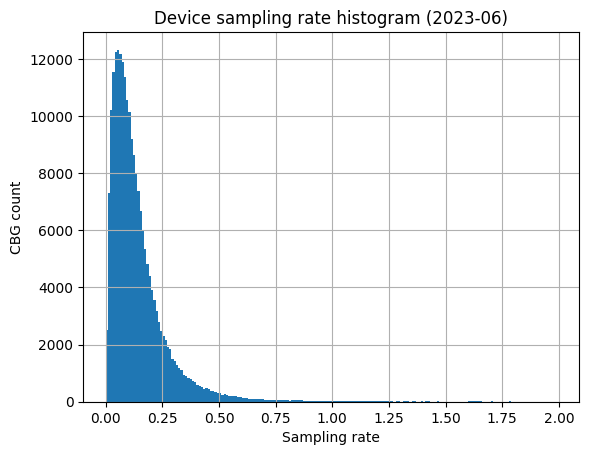

In [46]:
fig, ax = plt.subplots()
month = 6
ax.set_title(f"Device sampling rate histogram ({year}-{month:02})")
ax.set_xlabel("Sampling rate")
ax.set_ylabel("CBG count")

panel_ACS_df.query("totalpopulation > 0  ")['sampling_rate'].dropna().hist(ax=ax, bins=np.array(range(0, 200,1))/100)

In [47]:
# get people_per_device of a county

panel_ACS_df['county_FIPS'] = panel_ACS_df['CBG_FIPS'].str[:5]
sampling_rate_county_df = panel_ACS_df.groupby(['county_FIPS'], as_index=False).agg(    # , 'YEAR', "MON", "REGION", "ISO_COUNTRY_CODE"
    county_device=('NUMBER_DEVICES_RESIDING', 'sum'),
    county_device_daytime=('NUMBER_DEVICES_RESIDING', 'sum'),
    county_device_population=('totalpopulation', 'sum'),
    ) 

sampling_rate_county_df['person_per_device_county'] = sampling_rate_county_df['county_device_population'] /  sampling_rate_county_df['county_device']

print("National device and population count:\n")
print(sampling_rate_county_df[['county_device', 'county_device_population']].sum())

people_per_device_df = panel_ACS_df.merge(sampling_rate_county_df, left_on='county_FIPS', right_on='county_FIPS')
people_per_device_df.to_csv(person_per_device_fname, index=False)
people_per_device_df

National device and population count:

county_device                45282809
county_device_population    327227353
dtype: int64


YEAR  MON REGION ISO_COUNTRY_CODE CENSUS_BLOCK_GROUP  \
0       2023    6     AL               US       010010201001   
1       2023    6     AL               US       010010201002   
2       2023    6     AL               US       010010202001   
3       2023    6     AL               US       010010202002   
4       2023    6     AL               US       010010203001   
...      ...  ...    ...              ...                ...   
219119  2023    6     PR               US       721537506011   
219120  2023    6     PR               US       721537506012   
219121  2023    6     PR               US       721537506013   
219122  2023    6     PR               US       721537506021   
219123  2023    6     PR               US       721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            61                            54.0  010010201001   
1                           134                            97.0  010010201002   
2                            42                            48.0  010010202001   
3                            85                           158.0  010010202002   
4                           274                           286.0  010010203001   
...                         ...                             ...           ...   
219119                       73                            85.0  721537506011   
219120                      244                           189.0  721537506012   
219121                      134                           103.0  721537506013   
219122                      122                           146.0  721537506021   
219123                       54                            67.0  721537506022   

        totalpopulation  person_per_device  sampling_rate county_FIPS  \
0                   730          11.967213       0.083562       01001   
1                  1263           9.425373       0.106097       01001   
2                   835          19.880952       0.050299       01001   
3                  1124          13.223529       0.075623       01001   
4                  2774          10.124088       0.098774       01001   
...                 ...                ...            ...         ...   
219119              883          12.095890       0.082673       72153   
219120             2523          10.340164       0.096710       72153   
219121              991           7.395522       0.135217       72153   
219122             1577          12.926230       0.077362       72153   
219123              648          12.000000       0.083333       72153   

        county_device  county_device_daytime  county_device_population  \
0                8252                   8252                     55380   
1                8252                   8252                     55380   
2                8252                   8252                     55380   
3                8252                   8252                     55380   
4                8252                   8252                     55380   
...               ...                    ...                       ...   
219119           4885                   4885                     35428   
219120           4885                   4885                     35428   
219121           4885                   4885                     35428   
219122           4885                   4885                     35428   
219123           4885                   4885                     35428   

        person_per_device_county  
0                       6.711100  
1                       6.711100  
2                       6.711100  
3                       6.711100  
4                       6.711100  
...                          ...  
219119                  7.252405  
219120                  7.252405  
219121                  7.252405  
219122                  7.252405  
219123                  7.252405  

[219124 rows x 16 columns]

## Compute the inbounds for each destination CBG

merge the device_home_area and person_per_device, then groupby the destination

In [48]:
device_home_areas_df = pd.read_csv(device_home_areas_fname, dtype={"origin":str, "destination":str})
device_home_areas_df

origin   destination      device        stop
0          010010208012  010010201001  183.210250  788.761098
1          010010201001  010010201001  126.474173  544.499596
2          010010205002  010010201001  112.290153  483.434221
3          010010205001  010010201001   83.922115  361.303471
4          010010206001  010010201001   69.738095  300.238095
...                 ...           ...         ...         ...
188229561  780209900000  780309900000    8.405405   27.783784
188229562  420059505002  780309900000    8.405405   27.783784
188229563  011290441003  780309900000    8.405405   27.783784
188229564  780109701002  780309900000    8.405405   27.783784
188229565  291892133005  780309900000    8.405405   27.783784

[188229566 rows x 4 columns]

In [49]:
# people_per_device_df = pd.read_csv(person_per_device_fname, index=False)

print("Loading people_per_device_df from:", person_per_device_fname)
person_per_device_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS": str})

print("Total totalpopulation (billion):", person_per_device_df['totalpopulation'].sum() / 10**9)
person_per_device_df

Loading people_per_device_df from: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\person_per_device_2023_09.csv
Total totalpopulation (billion): 0.327227353


YEAR  MON REGION ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  \
0       2023    6     AL               US         10010201001   
1       2023    6     AL               US         10010201002   
2       2023    6     AL               US         10010202001   
3       2023    6     AL               US         10010202002   
4       2023    6     AL               US         10010203001   
...      ...  ...    ...              ...                 ...   
219119  2023    6     PR               US        721537506011   
219120  2023    6     PR               US        721537506012   
219121  2023    6     PR               US        721537506013   
219122  2023    6     PR               US        721537506021   
219123  2023    6     PR               US        721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            61                            54.0  010010201001   
1                           134                            97.0  010010201002   
2                            42                            48.0  010010202001   
3                            85                           158.0  010010202002   
4                           274                           286.0  010010203001   
...                         ...                             ...           ...   
219119                       73                            85.0  721537506011   
219120                      244                           189.0  721537506012   
219121                      134                           103.0  721537506013   
219122                      122                           146.0  721537506021   
219123                       54                            67.0  721537506022   

        totalpopulation  person_per_device  sampling_rate  county_FIPS  \
0                   730          11.967213       0.083562         1001   
1                  1263           9.425373       0.106097         1001   
2                   835          19.880952       0.050299         1001   
3                  1124          13.223529       0.075623         1001   
4                  2774          10.124088       0.098774         1001   
...                 ...                ...            ...          ...   
219119              883          12.095890       0.082673        72153   
219120             2523          10.340164       0.096710        72153   
219121              991           7.395522       0.135217        72153   
219122             1577          12.926230       0.077362        72153   
219123              648          12.000000       0.083333        72153   

        county_device  county_device_daytime  county_device_population  \
0                8252                   8252                     55380   
1                8252                   8252                     55380   
2                8252                   8252                     55380   
3                8252                   8252                     55380   
4                8252                   8252                     55380   
...               ...                    ...                       ...   
219119           4885                   4885                     35428   
219120           4885                   4885                     35428   
219121           4885                   4885                     35428   
219122           4885                   4885                     35428   
219123           4885                   4885                     35428   

        person_per_device_county  
0                       6.711100  
1                       6.711100  
2                       6.711100  
3                       6.711100  
4                       6.711100  
...                          ...  
219119                  7.252405  
219120                  7.252405  
219121                  7.252405  
219122                  7.252405  
219123                  7.252405  

[219124 rows x 16 columns]

In [50]:
origin_person_per_device_df = device_home_areas_df.merge(person_per_device_df[['CBG_FIPS', 'person_per_device', 'person_per_device_county']], left_on="origin", right_on="CBG_FIPS")
origin_person_per_device_df

origin   destination      device        stop      CBG_FIPS  \
0          010010208012  010010201001  183.210250  788.761098  010010208012   
1          010010208012  010010201001  183.210250  788.761098  010010208012   
2          010010208012  010010201002   15.635328   77.139601  010010208012   
3          010010208012  010010201002   15.635328   77.139601  010010208012   
4          010010208012  010010202001   39.625627  307.742618  010010208012   
...                 ...           ...         ...         ...           ...   
187677265  721537504003  721537504003   10.787879   36.363636  721537504003   
187677266  721537505031  721537505031   18.275862   77.413793  721537505031   
187677267  721537505031  721537505031   18.275862   77.413793  721537505031   
187677268  721537506011  721537506011   25.388601  173.005181  721537506011   
187677269  721537506011  721537506011   25.388601  173.005181  721537506011   

           person_per_device  person_per_device_county  
0                   5.561905                  6.711100  
1                   5.561905                  6.711100  
2                   5.561905                  6.711100  
3                   5.561905                  6.711100  
4                   5.561905                  6.711100  
...                      ...                       ...  
187677265          10.300000                  7.252405  
187677266          11.804124                  7.252405  
187677267          11.804124                  7.252405  
187677268          12.095890                  7.252405  
187677269          12.095890                  7.252405  

[187677270 rows x 7 columns]

In [51]:
origin_person_per_device_df['person_CBG_rate'] = origin_person_per_device_df['device'] * origin_person_per_device_df['person_per_device']
origin_person_per_device_df['person_county_rate'] = origin_person_per_device_df['device'] * origin_person_per_device_df['person_per_device_county']
origin_person_per_device_df[['person_CBG_rate','person_county_rate']].sum() / 10**9

person_CBG_rate       19.152490
person_county_rate    15.615551
dtype: float64

In [52]:
origin_person_per_device_df[['person_CBG_rate', 'device','stop']].sum() / 10**9

person_CBG_rate    19.152490
device              1.696408
stop                8.822539
dtype: float64

In [53]:
def get_inbound_person_per_device(df):
    inboud_per_per_device_CBG_rate = df['person_CBG_rate'].sum() /  df['device'].sum()
    inboud_per_per_device_county_rate = df['person_county_rate'].sum() /  df['device'].sum()
    return {"inboud_per_per_device_CBG_rate": inboud_per_per_device_CBG_rate, "inboud_per_per_device_county_rate": inboud_per_per_device_county_rate}

CBG_destination_inbound_per_device = origin_person_per_device_df.iloc[:].groupby('destination').progress_apply(get_inbound_person_per_device)
CBG_destination_inbound_per_device_df = pd.DataFrame(CBG_destination_inbound_per_device.tolist(), index=CBG_destination_inbound_per_device.index)
CBG_destination_inbound_per_device_df.to_csv(CBG_destination_inbound_per_device_fname)
print(CBG_destination_inbound_per_device_df.mean())
CBG_destination_inbound_per_device_df

100%|███████████████████████████████████████████████████████████████████████▊| 219992/220476 [03:34<00:00, 4460.78it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_22452\1583561830.py:2: RuntimeWarning: invalid value encountered in scalar divide
  inboud_per_per_device_CBG_rate = df['person_CBG_rate'].sum() /  df['device'].sum()
C:\Users\USER\AppData\Local\Temp\ipykernel_22452\1583561830.py:3: RuntimeWarning: invalid value encountered in scalar divide
  inboud_per_per_device_county_rate = df['person_county_rate'].sum() /  df['device'].sum()
100%|█████████████████████████████████████████████████████████████████████████| 220476/220476 [03:48<00:00, 964.51it/s]


inboud_per_per_device_CBG_rate       14.012035
inboud_per_per_device_county_rate    10.887431
dtype: float64


inboud_per_per_device_CBG_rate  \
destination                                    
010010201001                        7.212702   
010010201002                        6.946156   
010010202001                        8.069217   
010010202002                        6.870598   
010010203001                        7.448532   
...                                      ...   
780309611001                        7.513297   
780309611002                        5.594316   
780309612001                        6.545891   
780309612002                        4.270127   
780309900000                        4.513397   

              inboud_per_per_device_county_rate  
destination                                      
010010201001                           6.441856  
010010201002                           6.322294  
010010202001                           6.550899  
010010202002                           6.398367  
010010203001                           6.571277  
...                                         ...  
780309611001                           7.409722  
780309611002                           7.283612  
780309612001                           6.641583  
780309612002                           5.938500  
780309900000                           4.892464  

[220476 rows x 2 columns]

In [54]:
print("Loading CBG_destination_inbound_per_device_df from:", CBG_destination_inbound_per_device_fname)
CBG_destination_inbound_per_device_df = pd.read_csv(CBG_destination_inbound_per_device_fname, dtype={"destination": str}).set_index('destination')

print("CBG_destination_inbound_per_device_df.mean(): \n", CBG_destination_inbound_per_device_df.mean() )
CBG_destination_inbound_per_device_df

Loading CBG_destination_inbound_per_device_df from: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\CBG_destination_inbound_per_device_202309.csv
CBG_destination_inbound_per_device_df.mean(): 
 inboud_per_per_device_CBG_rate       14.012035
inboud_per_per_device_county_rate    10.887431
dtype: float64


inboud_per_per_device_CBG_rate  \
destination                                    
010010201001                        7.212702   
010010201002                        6.946156   
010010202001                        8.069217   
010010202002                        6.870598   
010010203001                        7.448532   
...                                      ...   
780309611001                        7.513297   
780309611002                        5.594316   
780309612001                        6.545891   
780309612002                        4.270127   
780309900000                        4.513397   

              inboud_per_per_device_county_rate  
destination                                      
010010201001                           6.441856  
010010201002                           6.322294  
010010202001                           6.550899  
010010202002                           6.398367  
010010203001                           6.571277  
...                                         ...  
780309611001                           7.409722  
780309611002                           7.283612  
780309612001                           6.641583  
780309612002                           5.938500  
780309900000                           4.892464  

[220476 rows x 2 columns]

In [55]:
print("Loading adjusted_dwelling_time_stop_CBG_df from:", adjusted_dwelling_time_stop_CBG_fname)
adjusted_dwelling_time_stop_CBG_df = pd.read_csv(adjusted_dwelling_time_stop_CBG_fname, dtype={"CBG": str}).set_index('CBG')

print("Total adjusted hourly stops (billion):", adjusted_dwelling_time_stop_CBG_df.iloc[:, 1:].sum().sum() / 10**9)
adjusted_dwelling_time_stop_CBG_df

Loading adjusted_dwelling_time_stop_CBG_df from: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\adjusted_dwelling_time_stop_CBG_2023_09.csv
Total adjusted hourly stops (billion): 8.835402752


hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  \
CBG                                                                            
010010201001       0       0       0       0       0       0      53      18   
010010201001       0       0       0       0       0       0      53      18   
010010201002       0       0       0       0       0       0      22      19   
010010201002       0       0       0       0       0       0      22      19   
010010202001       0       0       0       0       0      22      99      77   
...              ...     ...     ...     ...     ...     ...     ...     ...   
780309612001       2       0       0       1       0       0       8       3   
780309612002       3       0       0       0       0       6      13       9   
780309612002       3       0       0       0       0       6      13       9   
780309900000       0       0       0       0       0       0       0       1   
780309900000       0       0       0       0       0       0       0       1   

              hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
CBG                                                                          
010010201001       0        0       19        0       40        0        0   
010010201001       0        0       19        0       40        0        0   
010010201002       0       22        0       35       19       43       22   
010010201002       0       22        0       35       19       43       22   
010010202001     151      117       57       15       18       19       33   
...              ...      ...      ...      ...      ...      ...      ...   
780309612001       3        5       18        0        0        0        1   
780309612002       6       11       15        3       13       14       12   
780309612002       6       11       15        3       13       14       12   
780309900000       0        0        5        0        0        0        0   
780309900000       0        0        5        0        0        0        0   

              hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
CBG                                                                           
010010201001       57       41        0        0       40        0        0   
010010201001       57       41        0        0       40        0        0   
010010201002       35       33        0       36       15        0        0   
010010201002       35       33        0       36       15        0        0   
010010202001       81       14       34       42        0        0        0   
...               ...      ...      ...      ...      ...      ...      ...   
780309612001        2        5        3        4        2        1        2   
780309612002        3        8       15       10       17       13        0   
780309612002        3        8       15       10       17       13        0   
780309900000        0        0        5       21        0        0        0   
780309900000        0        0        5       21        0        0        0   

              hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
CBG                                                                           
010010201001        0        0        0        0        0        0        0   
010010201001        0        0        0        0        0        0        0   
010010201002        0        0        0        0        0        0        0   
010010201002        0        0        0        0        0        0        0   
010010202001       22        0        0        0        0        0        0   
...               ...      ...      ...      ...      ...      ...      ...   
780309612001        1        0        0        0        0        0        3   
780309612002        0        0        3        0        4        5        0   
780309612002        0        0        3        0        4        5        0   
780309900000        0        0        0        0        0    

In [56]:
adjusted_dwelling_time_stop_inbound_per_device_CBG_df = adjusted_dwelling_time_stop_CBG_df.merge(CBG_destination_inbound_per_device_df,left_index=True, right_index=True)
adjusted_dwelling_time_stop_inbound_per_device_CBG_df.index.name = 'CBG'
adjusted_dwelling_time_stop_inbound_per_device_CBG_df

hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  \
CBG                                                                            
010010201001       0       0       0       0       0       0      53      18   
010010201001       0       0       0       0       0       0      53      18   
010010201002       0       0       0       0       0       0      22      19   
010010201002       0       0       0       0       0       0      22      19   
010010202001       0       0       0       0       0      22      99      77   
...              ...     ...     ...     ...     ...     ...     ...     ...   
780309612001       2       0       0       1       0       0       8       3   
780309612002       3       0       0       0       0       6      13       9   
780309612002       3       0       0       0       0       6      13       9   
780309900000       0       0       0       0       0       0       0       1   
780309900000       0       0       0       0       0       0       0       1   

              hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
CBG                                                                          
010010201001       0        0       19        0       40        0        0   
010010201001       0        0       19        0       40        0        0   
010010201002       0       22        0       35       19       43       22   
010010201002       0       22        0       35       19       43       22   
010010202001     151      117       57       15       18       19       33   
...              ...      ...      ...      ...      ...      ...      ...   
780309612001       3        5       18        0        0        0        1   
780309612002       6       11       15        3       13       14       12   
780309612002       6       11       15        3       13       14       12   
780309900000       0        0        5        0        0        0        0   
780309900000       0        0        5        0        0        0        0   

              hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
CBG                                                                           
010010201001       57       41        0        0       40        0        0   
010010201001       57       41        0        0       40        0        0   
010010201002       35       33        0       36       15        0        0   
010010201002       35       33        0       36       15        0        0   
010010202001       81       14       34       42        0        0        0   
...               ...      ...      ...      ...      ...      ...      ...   
780309612001        2        5        3        4        2        1        2   
780309612002        3        8       15       10       17       13        0   
780309612002        3        8       15       10       17       13        0   
780309900000        0        0        5       21        0        0        0   
780309900000        0        0        5       21        0        0        0   

              hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
CBG                                                                           
010010201001        0        0        0        0        0        0        0   
010010201001        0        0        0        0        0        0        0   
010010201002        0        0        0        0        0        0        0   
010010201002        0        0        0        0        0        0        0   
010010202001       22        0        0        0        0        0        0   
...               ...      ...      ...      ...      ...      ...      ...   
780309612001        1        0        0        0        0        0        3   
780309612002        0        0        3        0        4        5        0   
780309612002        0        0        3        0        4        5        0   
780309900000        0        0        0        0        0    

In [15]:
hour_cnt = adjusted_dwelling_time_stop_CBG_df.shape[1]
print("hour_cnt:", hour_cnt)

NameError: name 'adjusted_dwelling_time_stop_CBG_df' is not defined

In [40]:
# inbound_hourly_df.iloc[:, hour]
# inbound_hourly_df.loc[:, 'inboud_per_per_device_CBG_rate']

In [58]:

inbound_hourly_df = adjusted_dwelling_time_stop_inbound_per_device_CBG_df.astype(np.float64).copy()

for hour in tqdm(range(hour_cnt)):
    # inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_per_device_CBG_rate']   # ？ 70.4215236989238 billion
    inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_per_device_county_rate']   # ？ 56.34291367286323 billion
print("Total restored inbound (billion) using per_device_county_rate:",  inbound_hourly_df.iloc[:, :hour].sum().sum() / 10**9)

inbound_hourly_df = adjusted_dwelling_time_stop_inbound_per_device_CBG_df.astype(np.float64).copy()

for hour in tqdm(range(hour_cnt)):
    inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_per_device_CBG_rate']   # 70.4215236989238 billion
    # inbound_hourly_df.iloc[:, hour] = inbound_hourly_df.iloc[:, hour] * inbound_hourly_df.loc[:, 'inboud_per_per_device_county_rate']   # 56.34291367286323 billion
print("Total restored inbound (billion) using per_device_CBG_rate:",  inbound_hourly_df.iloc[:, :hour].sum().sum() / 10**9)

print("We will use the larger resutls: per_device_CBG_rate.")

print("Saving inbound_hourly_df at:", inbound_hourly_df_fname)
inbound_hourly_df.to_csv(inbound_hourly_df_fname)
inbound_hourly_df

# Total restored inbound (billion) using per_device_county_rate: 51.178735299160714
# Total restored inbound (billion) using per_device_CBG_rate:    61.49318556384339


100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 493.06it/s]


Total restored inbound (billion) using per_device_county_rate: 77.03258198849431


100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:01<00:00, 502.37it/s]


Total restored inbound (billion) using per_device_CBG_rate: 92.44191075446292
We will use the larger resutls: per_device_CBG_rate.
Saving inbound_hourly_df at: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\inbound_hourly_202309.csv


hour_1  hour_2  hour_3    hour_4  hour_5      hour_6  \
CBG                                                                     
010010201001   0.000000     0.0     0.0  0.000000     0.0    0.000000   
010010201001   0.000000     0.0     0.0  0.000000     0.0    0.000000   
010010201002   0.000000     0.0     0.0  0.000000     0.0    0.000000   
010010201002   0.000000     0.0     0.0  0.000000     0.0    0.000000   
010010202001   0.000000     0.0     0.0  0.000000     0.0  177.522783   
...                 ...     ...     ...       ...     ...         ...   
780309612001  13.091781     0.0     0.0  6.545891     0.0    0.000000   
780309612002  12.810382     0.0     0.0  0.000000     0.0   25.620763   
780309612002  12.810382     0.0     0.0  0.000000     0.0   25.620763   
780309900000   0.000000     0.0     0.0  0.000000     0.0    0.000000   
780309900000   0.000000     0.0     0.0  0.000000     0.0    0.000000   

                  hour_7      hour_8       hour_9     hour_10     hour_11  \
CBG                                                                         
010010201001  382.273208  129.828637     0.000000    0.000000  137.041339   
010010201001  382.273208  129.828637     0.000000    0.000000  137.041339   
010010201002  152.815442  131.976973     0.000000  152.815442    0.000000   
010010201002  152.815442  131.976973     0.000000  152.815442    0.000000   
010010202001  798.852525  621.329741  1218.451830  944.098438  459.945393   
...                  ...         ...          ...         ...         ...   
780309612001   52.367126   19.637672    19.637672   32.729454  117.826033   
780309612002   55.511654   38.431145    25.620763   46.971399   64.051908   
780309612002   55.511654   38.431145    25.620763   46.971399   64.051908   
780309900000    0.000000    4.513397     0.000000    0.000000   22.566985   
780309900000    0.000000    4.513397     0.000000    0.000000   22.566985   

                 hour_12     hour_13     hour_14     hour_15     hour_16  \
CBG                                                                        
010010201001    0.000000  288.508082    0.000000    0.000000  411.124016   
010010201001    0.000000  288.508082    0.000000    0.000000  411.124016   
010010201002  243.115476  131.976973  298.684728  152.815442  243.115476   
010010201002  243.115476  131.976973  298.684728  152.815442  243.115476   
010010202001  121.038261  145.245914  153.315131  266.284175  653.606611   
...                  ...         ...         ...         ...         ...   
780309612001    0.000000    0.000000    0.000000    6.545891   13.091781   
780309612002   12.810382   55.511654   59.781781   51.241526   12.810382   
780309612002   12.810382   55.511654   59.781781   51.241526   12.810382   
780309900000    0.000000    0.000000    0.000000    0.000000    0.000000   
780309900000    0.000000    0.000000    0.000000    0.000000    0.000000   

                 hour_17     hour_18     hour_19     hour_20    hour_21  \
CBG                                                                       
010010201001  295.720784    0.000000    0.000000  288.508082   0.000000   
010010201001  295.720784    0.000000    0.000000  288.508082   0.000000   
010010201002  229.223163    0.000000  250.061633  104.192347   0.000000   
010010201002  229.223163    0.000000  250.061633  104.192347   0.000000   
010010202001  112.969044  274.353392  338.907132    0.000000   0.000000   
...                  ...         ...         ...         ...        ...   
780309612001   32.729454   19.637672   26.183563   13.091781   6.545891   
780309612002   34.161018   64.051908   42.701272   72.592162  55.511654   
780309612002   34.161018   64.051908   42.701272   72.592162  55.511654   
780309900000    0.000000   22.566985   94.781336    0.000000   0.000000   
780309900000    0.000000   22.566985   94.781336    0.000000   0.000000   

                hour_22     hour_23  hour_24    hour_25  hour_26    hour_27  \
CBG                  

In [59]:
# Get the hourly aggregated inbounds for all CBGs
inbound_hourly_df.iloc[:, :hour_cnt].sum().sum() / 10**9

92.48741143801236

In [60]:
hourly_agregated_inbound_df = pd.DataFrame(inbound_hourly_df.iloc[:, :hour_cnt].sum(), columns=['inboud']).reset_index()[['inboud']]
hourly_agregated_inbound_df.to_csv(hourly_agregated_inbound_fname, index=False)
print("Save hourly_agregated_inbound_df at:", hourly_agregated_inbound_fname)

CBG_agregated_inbound_df = pd.DataFrame(inbound_hourly_df.iloc[:, :hour_cnt].sum(axis=1), columns=['inboud'])
CBG_agregated_inbound_df.to_csv(CBG_agregated_inbound_fname)
print("Save CBG_agregated_inbound_df at:", CBG_agregated_inbound_fname)

Save hourly_agregated_inbound_df at: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\hourly_agregated_inbound_202309.csv
Save CBG_agregated_inbound_df at: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\CBG_agregated_inbound_202309.csv


In [61]:
hourly_agregated_inbound_df

inboud
0    5.103399e+07
1    2.813641e+07
2    2.401246e+07
3    2.745608e+07
4    4.267533e+07
..            ...
715  1.494836e+08
716  1.192470e+08
717  9.588794e+07
718  7.445729e+07
719  4.550068e+07

[720 rows x 1 columns]

In [62]:
CBG_agregated_inbound_df['inboud'].sum() / 10**9

92.48741143801236

In [63]:
people_per_device_df = pd.read_csv(person_per_device_fname, dtype={'CBG_FIPS': str})
people_per_device_df

YEAR  MON REGION ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  \
0       2023    6     AL               US         10010201001   
1       2023    6     AL               US         10010201002   
2       2023    6     AL               US         10010202001   
3       2023    6     AL               US         10010202002   
4       2023    6     AL               US         10010203001   
...      ...  ...    ...              ...                 ...   
219119  2023    6     PR               US        721537506011   
219120  2023    6     PR               US        721537506012   
219121  2023    6     PR               US        721537506013   
219122  2023    6     PR               US        721537506021   
219123  2023    6     PR               US        721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            61                            54.0  010010201001   
1                           134                            97.0  010010201002   
2                            42                            48.0  010010202001   
3                            85                           158.0  010010202002   
4                           274                           286.0  010010203001   
...                         ...                             ...           ...   
219119                       73                            85.0  721537506011   
219120                      244                           189.0  721537506012   
219121                      134                           103.0  721537506013   
219122                      122                           146.0  721537506021   
219123                       54                            67.0  721537506022   

        totalpopulation  person_per_device  sampling_rate  county_FIPS  \
0                   730          11.967213       0.083562         1001   
1                  1263           9.425373       0.106097         1001   
2                   835          19.880952       0.050299         1001   
3                  1124          13.223529       0.075623         1001   
4                  2774          10.124088       0.098774         1001   
...                 ...                ...            ...          ...   
219119              883          12.095890       0.082673        72153   
219120             2523          10.340164       0.096710        72153   
219121              991           7.395522       0.135217        72153   
219122             1577          12.926230       0.077362        72153   
219123              648          12.000000       0.083333        72153   

        county_device  county_device_daytime  county_device_population  \
0                8252                   8252                     55380   
1                8252                   8252                     55380   
2                8252                   8252                     55380   
3                8252                   8252                     55380   
4                8252                   8252                     55380   
...               ...                    ...                       ...   
219119           4885                   4885                     35428   
219120           4885                   4885                     35428   
219121           4885                   4885                     35428   
219122           4885                   4885                     35428   
219123           4885                   4885                     35428   

        person_per_device_county  
0                       6.711100  
1                       6.711100  
2                       6.711100  
3                       6.711100  
4                       6.711100  
...                          ...  
219119                  7.252405  
219120                  7.252405  
219121                  7.252405  
219122                  7.252405  
219123                  7.252405  

[219124 rows x 16 columns]

In [64]:
# Load flow data (month)
# device_home_areas_df = pd.read_csv(device_home_areas_fname, dtype={'origin':str, 'destination':str})
device_home_areas_df

origin   destination      device        stop
0          010010208012  010010201001  183.210250  788.761098
1          010010201001  010010201001  126.474173  544.499596
2          010010205002  010010201001  112.290153  483.434221
3          010010205001  010010201001   83.922115  361.303471
4          010010206001  010010201001   69.738095  300.238095
...                 ...           ...         ...         ...
188229561  780209900000  780309900000    8.405405   27.783784
188229562  420059505002  780309900000    8.405405   27.783784
188229563  011290441003  780309900000    8.405405   27.783784
188229564  780109701002  780309900000    8.405405   27.783784
188229565  291892133005  780309900000    8.405405   27.783784

[188229566 rows x 4 columns]

In [65]:
device_home_areas_person_per_device_df = device_home_areas_df.merge(people_per_device_df[['CBG_FIPS', 'person_per_device', 'person_per_device_county']], left_on='origin', right_on='CBG_FIPS')
device_home_areas_person_per_device_df

origin   destination      device        stop      CBG_FIPS  \
0          010010208012  010010201001  183.210250  788.761098  010010208012   
1          010010208012  010010201001  183.210250  788.761098  010010208012   
2          010010208012  010010201002   15.635328   77.139601  010010208012   
3          010010208012  010010201002   15.635328   77.139601  010010208012   
4          010010208012  010010202001   39.625627  307.742618  010010208012   
...                 ...           ...         ...         ...           ...   
187677265  721537504003  721537504003   10.787879   36.363636  721537504003   
187677266  721537505031  721537505031   18.275862   77.413793  721537505031   
187677267  721537505031  721537505031   18.275862   77.413793  721537505031   
187677268  721537506011  721537506011   25.388601  173.005181  721537506011   
187677269  721537506011  721537506011   25.388601  173.005181  721537506011   

           person_per_device  person_per_device_county  
0                   5.561905                  6.711100  
1                   5.561905                  6.711100  
2                   5.561905                  6.711100  
3                   5.561905                  6.711100  
4                   5.561905                  6.711100  
...                      ...                       ...  
187677265          10.300000                  7.252405  
187677266          11.804124                  7.252405  
187677267          11.804124                  7.252405  
187677268          12.095890                  7.252405  
187677269          12.095890                  7.252405  

[187677270 rows x 7 columns]

In [66]:
device_home_areas_person_per_device_df['stop'].sum() / 10**9, device_home_areas_person_per_device_df['device'].sum() / 10**9

(8.82253913658575, 1.6964079507160257)

In [50]:
# Not correct
# device_home_areas_person_per_device_df['outbound'] = device_home_areas_person_per_device_df['stop'] * device_home_areas_person_per_device_df['person_per_device']
# device_home_areas_person_per_device_df['outbound'].sum()  / 10**9

In [67]:
no_dict_colum_month_df = pd.read_csv(no_dict_colum_fname, dtype={"AREA":str})
no_dict_colum_month_df['destination'] = no_dict_colum_month_df['AREA'].astype(str).str.zfill(12)
no_dict_colum_month_df

AREA                                       STOPS_BY_DAY  \
0       010010201001  [263,132,188,195,444,592,610,748,403,174,919,5...   
1       010010201001  [263,132,188,195,444,592,610,748,403,174,919,5...   
2       010010201002  [309,92,115,157,173,462,191,246,131,96,266,132...   
3       010010201002  [309,92,115,157,173,462,191,246,131,96,266,132...   
4       010010202001  [799,115,211,148,575,636,653,477,215,416,560,7...   
...              ...                                                ...   
441361  780309612001  [74,36,40,49,47,48,55,72,37,36,53,35,69,46,39,...   
441362  780309612002  [192,176,98,186,321,408,457,287,240,149,258,26...   
441363  780309612002  [192,176,98,186,321,408,457,287,240,149,258,26...   
441364  780309900000  [33,29,50,44,34,53,51,7,0,2,29,15,41,28,13,50,...   
441365  780309900000  [33,29,50,44,34,53,51,7,0,2,29,15,41,28,13,50,...   

        RAW_STOP_COUNTS  RAW_DEVICE_COUNTS  MEDIAN_DWELL  \
0                 12747               2929      7.966667   
1                 12747               2929      7.966667   
2                  5858               1176     42.433333   
3                  5858               1176     42.433333   
4                 16397               2092      6.516667   
...                 ...                ...           ...   
441361             1493                460     44.166667   
441362             7609               1753      7.966667   
441363             7609               1753      7.966667   
441364             1003                311      1.666667   
441365             1003                311      1.666667   

                                       STOPS_BY_EACH_HOUR  adjusted_raw_stop  \
0       [0,0,0,0,0,0,53,18,0,0,19,0,40,0,0,57,41,0,0,4...              12610   
1       [0,0,0,0,0,0,53,18,0,0,19,0,40,0,0,57,41,0,0,4...              12610   
2       [0,0,0,0,0,0,22,19,0,22,0,35,19,43,22,35,33,0,...               5802   
3       [0,0,0,0,0,0,22,19,0,22,0,35,19,43,22,35,33,0,...               5802   
4       [0,0,0,0,0,22,99,77,151,117,57,15,18,19,33,81,...              16247   
...                                                   ...                ...   
441361  [-2,0,0,1,0,0,8,3,-3,5,18,0,0,0,1,2,5,3,-4,2,1...               1600   
441362  [3,0,0,0,0,6,13,9,6,11,15,3,13,14,12,3,8,15,10...               7479   
441363  [3,0,0,0,0,6,13,9,6,11,15,3,13,14,12,3,8,15,10...               7479   
441364  [0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,5,21,0,0,0,...               1028   
441365  [0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,5,21,0,0,0,...               1028   

         destination  
0       010010201001  
1       010010201001  
2       010010201002  
3       010010201002  
4       010010202001  
...              ...  
441361  780309612001  
441362  780309612002  
441363  780309612002  
441364  780309900000  
441365  780309900000  

[441366 rows x 8 columns]

In [68]:
no_dict_colum_month_df['adjusted_raw_stop'].sum() / 10**9

8.840364288

In [69]:
# device_home_areas_person_per_device_df.groupby('destination', as_index=False)#[['inbound']] .sum()
device_home_areas_person_per_device_df

origin   destination      device        stop      CBG_FIPS  \
0          010010208012  010010201001  183.210250  788.761098  010010208012   
1          010010208012  010010201001  183.210250  788.761098  010010208012   
2          010010208012  010010201002   15.635328   77.139601  010010208012   
3          010010208012  010010201002   15.635328   77.139601  010010208012   
4          010010208012  010010202001   39.625627  307.742618  010010208012   
...                 ...           ...         ...         ...           ...   
187677265  721537504003  721537504003   10.787879   36.363636  721537504003   
187677266  721537505031  721537505031   18.275862   77.413793  721537505031   
187677267  721537505031  721537505031   18.275862   77.413793  721537505031   
187677268  721537506011  721537506011   25.388601  173.005181  721537506011   
187677269  721537506011  721537506011   25.388601  173.005181  721537506011   

           person_per_device  person_per_device_county  
0                   5.561905                  6.711100  
1                   5.561905                  6.711100  
2                   5.561905                  6.711100  
3                   5.561905                  6.711100  
4                   5.561905                  6.711100  
...                      ...                       ...  
187677265          10.300000                  7.252405  
187677266          11.804124                  7.252405  
187677267          11.804124                  7.252405  
187677268          12.095890                  7.252405  
187677269          12.095890                  7.252405  

[187677270 rows x 7 columns]

In [72]:
destination_CBG_inbound_df = device_home_areas_person_per_device_df.groupby('destination', as_index=False)[['stop']].sum()#.sum()
destination_CBG_inbound_df['destination'] = destination_CBG_inbound_df['destination'].astype(str).str.zfill(12)

destination_CBG_inbound_device_device_count_df = destination_CBG_inbound_df.merge(no_dict_colum_month_df[['destination', 'RAW_STOP_COUNTS', 'RAW_DEVICE_COUNTS', 'MEDIAN_DWELL']],
                                                                                 left_on="destination",
                                                                                 right_on="destination")

destination_CBG_inbound_device_device_count_df['inbound_per_stop'] = destination_CBG_inbound_device_device_count_df['stop'] / destination_CBG_inbound_device_device_count_df['RAW_STOP_COUNTS']
destination_CBG_inbound_device_device_count_df

destination          stop  RAW_STOP_COUNTS  RAW_DEVICE_COUNTS  \
0       010010201001  25220.000000            12747               2929   
1       010010201001  25220.000000            12747               2929   
2       010010201002  11604.000000             5858               1176   
3       010010201002  11604.000000             5858               1176   
4       010010202001  32494.000000            16397               2092   
...              ...           ...              ...                ...   
440947  780309612001    176.146789             1493                460   
440948  780309612002   4710.057252             7609               1753   
440949  780309612002   4710.057252             7609               1753   
440950  780309900000   1361.405405             1003                311   
440951  780309900000   1361.405405             1003                311   

        MEDIAN_DWELL  inbound_per_stop  
0           7.966667          1.978505  
1           7.966667          1.978505  
2          42.433333          1.980881  
3          42.433333          1.980881  
4           6.516667          1.981704  
...              ...               ...  
440947     44.166667          0.117982  
440948      7.966667          0.619011  
440949      7.966667          0.619011  
440950      1.666667          1.357333  
440951      1.666667          1.357333  

[440952 rows x 6 columns]

In [74]:
destination_CBG_inbound_device_device_count_df['inbound'].sum() / 1000000000, destination_CBG_inbound_device_device_count_df['RAW_STOP_COUNTS'].sum() / 1000000000

KeyError: 'inbound'

In [77]:
destination_CBG_inbound_device_device_count_df.to_csv(CBG_destination_inbound_fname, index=False)
print("Saved destination_CBG_inbound_device_device_count_df as:", CBG_destination_inbound_fname)
destination_CBG_inbound_device_device_count_df

Saved destination_CBG_inbound_device_device_count_df as: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\CBG_destination_inbound_202309.csv


destination          stop  RAW_STOP_COUNTS  RAW_DEVICE_COUNTS  \
0       010010201001  25220.000000            12747               2929   
1       010010201001  25220.000000            12747               2929   
2       010010201002  11604.000000             5858               1176   
3       010010201002  11604.000000             5858               1176   
4       010010202001  32494.000000            16397               2092   
...              ...           ...              ...                ...   
440947  780309612001    176.146789             1493                460   
440948  780309612002   4710.057252             7609               1753   
440949  780309612002   4710.057252             7609               1753   
440950  780309900000   1361.405405             1003                311   
440951  780309900000   1361.405405             1003                311   

        MEDIAN_DWELL  inbound_per_stop  
0           7.966667          1.978505  
1           7.966667          1.978505  
2          42.433333          1.980881  
3          42.433333          1.980881  
4           6.516667          1.981704  
...              ...               ...  
440947     44.166667          0.117982  
440948      7.966667          0.619011  
440949      7.966667          0.619011  
440950      1.666667          1.357333  
440951      1.666667          1.357333  

[440952 rows x 6 columns]

In [78]:
destination_CBG_inbound_device_device_count_df['inbound'].sum() / 1000000000

KeyError: 'inbound'

## Compute the hourly inbound (not used, not correct)

In [ ]:
destination_CBG_inbound_df = pd.read_csv(CBG_destination_inbound_fname, dtype={'destination':str})
destination_CBG_inbound_df

In [ ]:
destination_CBG_inbound_df.sample(30)['inbound_per_stop']#.mean()

In [ ]:
print("Loading in adjusted_dwelling_time_stop_CBG_df from:", adjusted_dwelling_time_stop_CBG_fname)
adjusted_dwelling_time_stop_CBG_df = pd.read_csv(adjusted_dwelling_time_stop_CBG_fname, dtype={'CBG':str})
print("Total adjusted observed stop (billion):", adjusted_dwelling_time_stop_CBG_df.iloc[:, 1:].sum().sum() / 1000000000)
adjusted_dwelling_time_stop_CBG_df

In [ ]:
hour_cnt = adjusted_dwelling_time_stop_CBG_df.shape[1] - 1
print("hour_cnt:", hour_cnt)

In [ ]:
adjusted_stop_inbound_per_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df.merge(destination_CBG_inbound_df[['destination','inbound_per_stop']],
                                                                                left_on="CBG",
                                                                                right_on="destination",
                                                                                )
adjusted_stop_inbound_per_stop_CBG_df

In [ ]:
hourly_inbound_df = adjusted_stop_inbound_per_stop_CBG_df.copy()
for h in range(hour_cnt):
    hourly_inbound_df.iloc[:, h + 1] = hourly_inbound_df.iloc[:, h + 1] * hourly_inbound_df['inbound_per_stop']  

hourly_inbound_df = hourly_inbound_df.iloc[:, :-2]
print("Total inbound (billion):", hourly_inbound_df.iloc[:, 1:].sum().sum() / 1000000000)
hourly_inbound_df

In [ ]:
hourly_inbound_df.iloc[:, 1:].sum().sum()

# IPF  v2

### Restored the outbound according to device sampling rate

In [79]:
CBG_device_stop_origin_distribution_df = pd.read_csv(CBG_device_stop_origin_distribution_fname)
print("Total observed stops (billion): ", CBG_device_stop_origin_distribution_df['stop'].sum() / 1000000000)
CBG_device_stop_origin_distribution_df

Total observed stops (billion):  8.840346058


origin        device          stop
0       010010201001   3920.470108  22288.323711
1       010010201002   8273.614997  47908.323637
2       010010202001   7011.032731  41194.134368
3       010010202002   8084.927794  47746.284461
4       010010203001  15654.440806  95897.551766
...              ...           ...           ...
230784   CA:61060135      2.084314     38.710410
230785   CA:61060140     66.505866    431.587131
230786   CA:61060141     11.284689     25.446997
230787   CA:61060158    138.921104    696.237001
230788   CA:62050013     33.261578    117.333199

[230789 rows x 3 columns]

In [80]:
people_per_device_df = pd.read_csv(person_per_device_fname, dtype={'CBG_FIPS': str})
people_per_device_df

YEAR  MON REGION ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  \
0       2023    6     AL               US         10010201001   
1       2023    6     AL               US         10010201002   
2       2023    6     AL               US         10010202001   
3       2023    6     AL               US         10010202002   
4       2023    6     AL               US         10010203001   
...      ...  ...    ...              ...                 ...   
219119  2023    6     PR               US        721537506011   
219120  2023    6     PR               US        721537506012   
219121  2023    6     PR               US        721537506013   
219122  2023    6     PR               US        721537506021   
219123  2023    6     PR               US        721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            61                            54.0  010010201001   
1                           134                            97.0  010010201002   
2                            42                            48.0  010010202001   
3                            85                           158.0  010010202002   
4                           274                           286.0  010010203001   
...                         ...                             ...           ...   
219119                       73                            85.0  721537506011   
219120                      244                           189.0  721537506012   
219121                      134                           103.0  721537506013   
219122                      122                           146.0  721537506021   
219123                       54                            67.0  721537506022   

        totalpopulation  person_per_device  sampling_rate  county_FIPS  \
0                   730          11.967213       0.083562         1001   
1                  1263           9.425373       0.106097         1001   
2                   835          19.880952       0.050299         1001   
3                  1124          13.223529       0.075623         1001   
4                  2774          10.124088       0.098774         1001   
...                 ...                ...            ...          ...   
219119              883          12.095890       0.082673        72153   
219120             2523          10.340164       0.096710        72153   
219121              991           7.395522       0.135217        72153   
219122             1577          12.926230       0.077362        72153   
219123              648          12.000000       0.083333        72153   

        county_device  county_device_daytime  county_device_population  \
0                8252                   8252                     55380   
1                8252                   8252                     55380   
2                8252                   8252                     55380   
3                8252                   8252                     55380   
4                8252                   8252                     55380   
...               ...                    ...                       ...   
219119           4885                   4885                     35428   
219120           4885                   4885                     35428   
219121           4885                   4885                     35428   
219122           4885                   4885                     35428   
219123           4885                   4885                     35428   

        person_per_device_county  
0                       6.711100  
1                       6.711100  
2                       6.711100  
3                       6.711100  
4                       6.711100  
...                          ...  
219119                  7.252405  
219120                  7.252405  
219121                  7.252405  
219122                  7.252405  
219123                  7.252405  

[219124 rows x 16 columns]

In [81]:
CBG_origin_stop_distribution_sampling_rate_df = CBG_device_stop_origin_distribution_df.merge(people_per_device_df, left_on='origin', right_on='CBG_FIPS')
CBG_origin_stop_distribution_sampling_rate_df

origin        device          stop  YEAR  MON REGION  \
0       010010201001   3920.470108  22288.323711  2023    6     AL   
1       010010201002   8273.614997  47908.323637  2023    6     AL   
2       010010202001   7011.032731  41194.134368  2023    6     AL   
3       010010202002   8084.927794  47746.284461  2023    6     AL   
4       010010203001  15654.440806  95897.551766  2023    6     AL   
...              ...           ...           ...   ...  ...    ...   
218894  721537506011     50.777202    346.010363  2023    6     PR   
218895  721537506012    168.315814   1871.402412  2023    6     PR   
218896  721537506013    210.671982   1334.861334  2023    6     PR   
218897  721537506021    126.182024    818.113879  2023    6     PR   
218898  721537506022     40.044913    346.858631  2023    6     PR   

       ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  NUMBER_DEVICES_RESIDING  \
0                    US         10010201001                       61   
1                    US         10010201002                      134   
2                    US         10010202001                       42   
3                    US         10010202002                       85   
4                    US         10010203001                      274   
...                 ...                 ...                      ...   
218894               US        721537506011                       73   
218895               US        721537506012                      244   
218896               US        721537506013                      134   
218897               US        721537506021                      122   
218898               US        721537506022                       54   

        NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  totalpopulation  \
0                                 54.0  010010201001              730   
1                                 97.0  010010201002             1263   
2                                 48.0  010010202001              835   
3                                158.0  010010202002             1124   
4                                286.0  010010203001             2774   
...                                ...           ...              ...   
218894                            85.0  721537506011              883   
218895                           189.0  721537506012             2523   
218896                           103.0  721537506013              991   
218897                           146.0  721537506021             1577   
218898                            67.0  721537506022              648   

        person_per_device  sampling_rate  county_FIPS  county_device  \
0               11.967213       0.083562         1001           8252   
1                9.425373       0.106097         1001           8252   
2               19.880952       0.050299         1001           8252   
3               13.223529       0.075623         1001           8252   
4               10.124088       0.098774         1001           8252   
...                   ...            ...          ...            ...   
218894          12.095890       0.082673        72153           4885   
218895          10.340164       0.096710        72153           4885   
218896           7.395522       0.135217        72153           4885   
218897          12.926230       0.077362        72153           4885   
218898          12.000000       0.083333        72153           4885   

        county_device_daytime  county_device_population  \
0                        8252                     55380   
1                        8252                     55380   
2                        8252                     55380   
3                        8252                     55380   
4                        8252                     55380   
...                       ...                       ...   
218894                   4885                     35428   
218895                   4885                     35428   
218896                   4885      

Because "stop" is the combination of visitors from various HOME CBGs! So, we need to compute the inbound. 

The outbound compuated below can be view as the distribution only.

In [82]:
person_per_device_national = CBG_origin_stop_distribution_sampling_rate_df['totalpopulation'].sum() / CBG_origin_stop_distribution_sampling_rate_df['NUMBER_DEVICES_RESIDING'].sum()
CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'] = CBG_origin_stop_distribution_sampling_rate_df['stop'] * person_per_device_national
restored_total_restored_outbound_count = CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'].sum() /  10**9
print("Restored total outbound distribution (billion) using national sampling rate:", restored_total_restored_outbound_count)  # 37.44716723845148 billion

CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'] = CBG_origin_stop_distribution_sampling_rate_df['stop'] * CBG_origin_stop_distribution_sampling_rate_df['person_per_device_county']
restored_total_restored_outbound_count = CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'].sum() /  10**9
print("Restored total outbound distribution (billion) using county sampling rate:", restored_total_restored_outbound_count)  # 50.96843487672891 billion

CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'] = CBG_origin_stop_distribution_sampling_rate_df['stop'] * CBG_origin_stop_distribution_sampling_rate_df['person_per_device']
restored_total_restored_outbound_count = CBG_origin_stop_distribution_sampling_rate_df['restored_outbound_count'].sum() / 10**9
CBG_origin_stop_distribution_sampling_rate_df.to_csv(CBG_origin_outbound_distribution_sampling_rate_fname, index=False)
print("Restored total outbound distribution (billion) using CBG sampling rate:", restored_total_restored_outbound_count)  # 61.19985609714293 billion

print("Saved CBG_origin_outbound_distribution_sampling_rate at:", CBG_origin_outbound_distribution_sampling_rate_fname)

Restored total outbound distribution (billion) using national sampling rate: 63.744617842355105
Restored total outbound distribution (billion) using county sampling rate: 76.78120018594687
Restored total outbound distribution (billion) using CBG sampling rate: 92.09797615897592
Saved CBG_origin_outbound_distribution_sampling_rate at: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\CBG_origin_outbound_distribution_sampling_rate_202309.csv


In [ ]:
# use the total_inboud to calibrate the outbound

# restored_outbound_count

## Load data

In [83]:
hourly_agregated_inbound_df = pd.read_csv(hourly_agregated_inbound_fname)
total_inbound = hourly_agregated_inbound_df['inboud'].sum()
print("total_inbound (billion):", total_inbound / 10**9)

total_inbound (billion): 92.48741143801236


In [ ]:
# hourly_agregated_inbound_df

In [84]:
CBG_restored_origin_outbound_df = pd.read_csv(CBG_origin_outbound_distribution_sampling_rate_fname)
total_outbound = CBG_restored_origin_outbound_df['restored_outbound_count'].sum()
print("Total outbound distribution (billions): ",  total_outbound / 1000000000)


factor = total_inbound / total_outbound
print("factor:", factor)


CBG_restored_origin_outbound_df['restored_outbound_count'] = CBG_restored_origin_outbound_df['restored_outbound_count'] * factor

print("Total outbound distribution (billions): ",   CBG_restored_origin_outbound_df['restored_outbound_count'].sum() / 10**9)

Total outbound distribution (billions):  92.09797615897592
factor: 1.004228488999196
Total outbound distribution (billions):  92.48741143801236


In [ ]:
CBG_restored_origin_outbound_df.shape

In [ ]:
# Load 

In [ ]:
# adjusted_dwelling_time_stop_natinol_df = pd.read_csv(adjusted_dwelling_time_stop_natinol_fname)
# total_adjusted_stops = adjusted_dwelling_time_stop_natinol_df['stop'].sum()
# print("total_adjusted_stops (billion):", total_adjusted_stops / 1000000000)

# # covnert distribution to acution outbound
# outbound_per_stop = total_outbound / total_adjusted_stops 

# adjusted_dwelling_time_stop_natinol_df['stop'] *= outbound_per_stop
# print("total outbouds (billion):", adjusted_dwelling_time_stop_natinol_df['stop'].sum() / 1000000000)

### start IPF

In [85]:
import numpy as np
from ipfn import ipfn

restored_CBG_outbound_arr = CBG_restored_origin_outbound_df['restored_outbound_count'].to_numpy()
restored_hourly_outbound_arr = hourly_agregated_inbound_df['inboud'].to_numpy()  # 

aggregates = [restored_CBG_outbound_arr, restored_hourly_outbound_arr]
dimensions = [[0], [1]]

seed_arr = np.ones((len(restored_CBG_outbound_arr), len(restored_hourly_outbound_arr)))

IPF = ipfn.ipfn(seed_arr, aggregates, dimensions, convergence_rate=1e-3)
m = IPF.iteration()
print(m.shape)

C:\Users\USER\.conda\envs\geo\lib\site-packages\ipfn\ipfn.py:146: RuntimeWarning: invalid value encountered in scalar divide
  if abs(m_ijk / ori_ijk - 1) > max_conv:


(218899, 720)


In [86]:
print("Error of IPF:")
print((m.sum(axis=1) - restored_CBG_outbound_arr).sum(), (m.sum(axis=0) - restored_hourly_outbound_arr).sum())

Error of IPF:
-1.1420518941207547e-05 -5.0555914640426636e-05


In [87]:
(m.sum(axis=1) - restored_CBG_outbound_arr).max(), (m.sum(axis=0) - restored_hourly_outbound_arr).max()

(4.656612873077393e-10, 7.420778274536133e-06)

In [88]:
(m.sum(axis=1) - restored_CBG_outbound_arr).min(), (m.sum(axis=0) - restored_hourly_outbound_arr).min()

(-7.450580596923828e-09, -8.702278137207031e-06)

In [89]:
# Save IPF results
hourly_columns = [f'hour_{h+1}' for h in range(restored_hourly_outbound_arr.shape[0])]
IPF_df = pd.DataFrame(m, columns=hourly_columns)
print("Total outbound visitor (billion):", IPF_df.sum().sum() / 1000000000)

 
IPF_df['CBG'] = CBG_restored_origin_outbound_df['origin'].astype(str).str.zfill(12)
IPF_df = IPF_df[['CBG'] + hourly_columns]

print("Saving IPF at:", IPF_results_fname)
IPF_df.to_csv(IPF_results_fname, index=False)
print("Saved IPF_results at:", IPF_results_fname)
IPF_df

Total outbound visitor (billion): 92.4874114380123
Saving IPF at: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\IPF_origin_outgoer_hourly_202309.csv
Saved IPF_results at: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\IPF_origin_outgoer_hourly_202309.csv


CBG      hour_1      hour_2      hour_3      hour_4  \
0       010010201001  147.801854   81.487139   69.543561   79.516811   
1       010010201002  250.218247  137.952053  117.732406  134.616423   
2       010010202001  453.818313  250.202248  213.530078  244.152450   
3       010010202002  349.861713  192.888176  164.616536  188.224212   
4       010010203001  537.988342  296.607449  253.133665  289.435591   
...              ...         ...         ...         ...         ...   
218894  721537506011    2.319190    1.278632    1.091223    1.247715   
218895  721537506012   10.722698    5.911712    5.045232    5.768769   
218896  721537506013    5.470342    3.015947    2.573899    2.943022   
218897  721537506021    5.859966    3.230757    2.757224    3.152638   
218898  721537506022    2.306446    1.271605    1.085226    1.240859   

            hour_5      hour_6       hour_7       hour_8       hour_9  \
0       123.593956  221.796917   349.846311   488.243295   512.700037   
1       209.235961  375.486735   592.265443   826.561900   867.965462   
2       379.489153  681.016507  1074.185865  1499.126987  1574.220209   
3       292.559205  525.015396   828.121068  1155.720516  1213.612061   
4       449.873296  807.325158  1273.415937  1777.171213  1866.192032   
...            ...         ...          ...          ...          ...   
218894    1.939339    3.480263     5.489513     7.661130     8.044885   
218895    8.966468   16.090876    25.380576    35.420971    37.195254   
218896    4.574375    8.208997    12.948274    18.070529    18.975705   
218897    4.900184    8.793681    13.870512    19.357599    20.327246   
218898    1.928682    3.461137     5.459346     7.619029     8.000676   

            hour_10      hour_11      hour_12      hour_13      hour_14  \
0        523.342696   563.225431   599.341776   642.874355   661.084267   
1        885.982741   953.501436  1014.643892  1088.341518  1119.169630   
2       1606.897968  1729.355943  1840.249400  1973.914041  2029.826677   
3       1238.804294  1333.210702  1418.701687  1521.747639  1564.852313   
4       1904.930560  2050.100909  2181.561860  2340.017384  2406.300179   
...             ...          ...          ...          ...          ...   
218894     8.211882     8.837690     9.404399    10.087478    10.373214   
218895    37.967355    40.860759    43.480920    46.639113    47.960201   
218896    19.369604    20.845717    22.182430    23.793629    24.467602   
218897    20.749200    22.330449    23.762369    25.488325    26.210301   
218898     8.166754     8.789124     9.352719    10.032044    10.316209   

            hour_15      hour_16      hour_17      hour_18      hour_19  \
0        687.330949   716.258901   693.499092   656.684502   593.882517   
1       1163.603436  1212.576443  1174.045671  1111.721134  1005.401748   
2       2110.415823  2199.237673  2129.354800  2016.317416  1823.487016   
3       1626.980826  1695.456168  1641.581433  1554.437632  1405.779079   
4       2501.836256  2607.131962  2524.287859  2390.285345  2161.690544   
...             ...          ...          ...          ...          ...   
218894    10.785056    11.238971    10.881842    10.304176     9.318737   
218895    49.864340    51.962999    50.311825    47.641008    43.084863   
218896    25.439026    26.509688    25.667317    24.304760    21.980376   
218897    27.250915    28.397834    27.495466    26.035862    23.545924   
218898    10.725788    11.177208    10.822042    10.247551     9.267527   

            hour_20      hour_21      hour_22     hour_23     hour_24  \
0        506.474365   405.828980   321.046865  236.296480  133.047321   
1        857.425832   687.040203   543.509987  400.033487  225.239851   
2       1555.104589  1246.077892   985.758585  725.536704  408.515247   
3       1198.875274   960.637622   759.949911  559.337308  314.936263   
4       1843.531023  1477.188909  1168.587981  860.102550  484.282881   
...             ...          ...   

In [ ]:
Not use below

##	Adjust stop count by dwelling time

Load the raw stop data and Neighorhood Patterns table.

In [ ]:
# Load the raw stop data and Neighorhood Patterns table.

# device_home_areas_df = pd.read_csv(device_home_areas_fname)
# print("Loading no_dict_colum CSV file:", no_dict_colum_fname)
no_dict_colum_df = pd.read_csv(no_dict_colum_fname)

no_dict_colum_df

In [ ]:
# non_adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=no_dict_colum_df.iloc[:], adjust_dwell_time=False, clean_negative=True)
# print("sum of non_adjusted_dwell_time_stop_CBG_arr (million):", non_adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000)
# print("shape of non_adjusted_dwell_time_stop_CBG_arr:", non_adjusted_dwell_time_stop_CBG_arr.shape)

In [ ]:
# adjusted_dwell_time_stop_CBG_arr = ad_op.adjust_stop_by_dwelling_time(np_df=no_dict_colum_df.iloc[:], adjust_dwell_time=True, clean_negative=True)

# adjusted_dwell_time_stop_national_arr = adjusted_dwell_time_stop_CBG_arr.sum(axis=0)

# print("sum of adjusted_dwell_time_stop_CBG_arr (million):", adjusted_dwell_time_stop_CBG_arr.sum().sum()/1000000)
# print("sum of adjusted_dwell_time_stop_national_arr (million):", adjusted_dwell_time_stop_national_arr.sum().sum()/1000000)
# print("shape of adjusted_dwell_time_stop_CBG_arr:", adjusted_dwell_time_stop_CBG_arr.shape)

In [ ]:
# hourly_columns
# adjusted_dwell_time_stop_national_arr.shape

Convert numpy array to DataFrame

In [ ]:
# convert numpy array to DataFrame
# CBG level
hourly_columns = [f'hour_{h+1}' for h in range(adjusted_dwell_time_stop_CBG_arr.shape[1])]
adjusted_dwelling_time_stop_CBG_df = pd.DataFrame(adjusted_dwell_time_stop_CBG_arr, columns=hourly_columns)
adjusted_dwelling_time_stop_CBG_df['CBG'] = no_dict_colum_df['AREA'].astype(str).str.zfill(12).to_list()
adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df[['CBG'] + hourly_columns]  # reorder columns
adjusted_dwelling_time_stop_CBG_df = adjusted_dwelling_time_stop_CBG_df.sort_values('CBG')


# national level
adjusted_dwelling_time_stop_natinol_df = pd.DataFrame(adjusted_dwell_time_stop_national_arr, columns=['stop'])

adjusted_dwelling_time_stop_CBG_df

In [ ]:
print("Adjustted total stop (billion) by dwelling time from CBG and national level (should be the same):")
print(adjusted_dwelling_time_stop_CBG_df[hourly_columns].sum().sum() / 1000000000,  adjusted_dwelling_time_stop_natinol_df.sum().sum()/ 1000000000)

In [ ]:
# Save CSV files
adjusted_dwelling_time_stop_natinol_df.to_csv(adjusted_dwelling_time_stop_natinol_fname, index=False)
print("Saved national hourly stop at:", adjusted_dwelling_time_stop_natinol_fname)

adjusted_dwelling_time_stop_CBG_df.to_csv(adjusted_dwelling_time_stop_CBG_fname, index=False)
print("Saved CBG hourly stop at:", adjusted_dwelling_time_stop_CBG_fname)

###  Convert observed stop counts to actual visitor counts.

#### compute the person_per_device at CBG and county level

Load ACS and home panel data, merge them into device sampling rate table at CBG and county level

In [ ]:
ACS_df = pd.read_csv(ACS_file)
ACS_df["CBG_FIPS"] = ACS_df["fips"].astype(str).str.zfill(12)
print("Total US population (million):",  ACS_df['totalpopulation'].sum() / 1000000)

In [ ]:
print("Loading home panel file:", home_panel_fname)
panel_df = pd.read_csv(home_panel_fname)
target_panel_df = panel_df.query(f"YEAR == {year} and MON == {int(month)} and ISO_COUNTRY_CODE == 'US' ")
target_panel_df

In [ ]:
panel_ACS_df = target_panel_df.merge(ACS_df[['CBG_FIPS', 'totalpopulation']], left_on='CENSUS_BLOCK_GROUP', right_on='CBG_FIPS')
panel_ACS_df = panel_ACS_df.dropna(subset='NUMBER_DEVICES_RESIDING')
panel_ACS_df['NUMBER_DEVICES_RESIDING'] = panel_ACS_df['NUMBER_DEVICES_RESIDING'].astype(int)
panel_ACS_df = panel_ACS_df.sort_values('CBG_FIPS')
panel_ACS_df['person_per_device'] = panel_ACS_df['totalpopulation'] / panel_ACS_df['NUMBER_DEVICES_RESIDING']
print("Data cover US population:", panel_ACS_df['totalpopulation'].sum())
panel_ACS_df

In [ ]:
# get people_per_device of a county

panel_ACS_df['county_FIPS'] = panel_ACS_df['CBG_FIPS'].str[:5]
sampling_rate_county_df = panel_ACS_df.groupby(['county_FIPS'], as_index=False).agg(    # , 'YEAR', "MON", "REGION", "ISO_COUNTRY_CODE"
    county_device=('NUMBER_DEVICES_RESIDING', 'sum'),
    county_device_daytime=('NUMBER_DEVICES_RESIDING', 'sum'),
    county_device_population=('totalpopulation', 'sum'),
    ) 

sampling_rate_county_df['person_per_device_county'] = sampling_rate_county_df['county_device_population'] /  sampling_rate_county_df['county_device']

print("National device and population count:\n")
print(sampling_rate_county_df[['county_device', 'county_device_population']].sum())

people_per_device_df = panel_ACS_df.merge(sampling_rate_county_df, left_on='county_FIPS', right_on='county_FIPS')
people_per_device_df.to_csv(person_per_device_fname, index=False)
people_per_device_df

#### restore the observated stop count to actual visitor count

In [ ]:
people_per_device_df = pd.read_csv(person_per_device_fname, dtype={'CBG_FIPS': str})
adjusted_dwelling_time_stop_CBG_df = pd.read_csv(adjusted_dwelling_time_stop_CBG_fname, dtype={'CBG':str})

In [ ]:
adjusted_dwelling_time_stop_CBG_df
# people_per_device_df

In [ ]:
adjusted_dwelling_time_stop_CBG_df.shape

## Get the total outgoer

In [ ]:
device_home_areas_df = pd.read_csv(device_home_areas_fname)
device_home_areas_df

In [ ]:
# Assume a stop is a device
hour_cnt = adjusted_dwelling_time_stop_CBG_df.shape[1] - 1


hourly_stop_sampling_rate_df = adjusted_dwelling_time_stop_CBG_df.merge(people_per_device_df, left_on='CBG', right_on='CBG_FIPS')
national_people_per_device = hourly_stop_sampling_rate_df['totalpopulation'].sum() / hourly_stop_sampling_rate_df['NUMBER_DEVICES_RESIDING'].sum()

print("hour_cnt:", hour_cnt)
print("national_people_per_device:", national_people_per_device)

for h in range(hour_cnt):
    hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * hourly_stop_sampling_rate_df['person_per_device']   # CBG leval   # BUG: person_per_device is for home(origin), not for destination!!!!!!!!!!!!
    # hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * national_people_per_device    # national leval
    # hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * hourly_stop_sampling_rate_df['person_per_device_county']   # county level
    

## used      CBG level sampling rate: 51028323628.24674
## used   county level sampling rate: 51223351774.32022   # increase 0.3%
## used national level sampling rate: 37518194037.32022   # decrease 26.5%

restored_actual_CBG_hourly_visitor_df = hourly_stop_sampling_rate_df.iloc[:, :hour_cnt + 1]

print("Restored total visitor count (billion):")
print(restored_actual_CBG_hourly_visitor_df.iloc[:, 1:hour_cnt + 1].sum().sum() / 1000000000)  # used CBG level sampling rate: 51028323628.24674

print("Restored total visitor dataframe shape:",  restored_actual_CBG_hourly_visitor_df.shape)

In [ ]:
restored_actual_CBG_hourly_visitor_df

In [ ]:
print("Restored actuall CBG hourly visitor (billion):")
print(restored_actual_CBG_hourly_visitor_df.iloc[:, 1:hour_cnt + 1].sum().sum()/ 1000000000)

In [ ]:
restored_actual_target_hourly_visitor_df = pd.DataFrame()
restored_actual_target_hourly_visitor_df['stop'] = restored_actual_CBG_hourly_visitor_df.iloc[:, 1:hour_cnt + 1].sum(axis=0) 
print("Restored actuall target hourly visitor (billion):")
print(restored_actual_target_hourly_visitor_df['stop'].sum() / 1000000000)
restored_actual_target_hourly_visitor_df

In [ ]:
# save the restored actual visitor count
restored_actual_CBG_hourly_visitor_df.to_csv(restored_CBG_hourly_vistor_count_fname, index=False)
restored_actual_target_hourly_visitor_df.to_csv(restored_target_hourly_vistor_count_fname, index=False)

## IPF

### Load data

In [ ]:
restored_actual_target_hourly_visitor_df = pd.read_csv(restored_target_hourly_vistor_count_fname, dtype={'CBG': str})
print("Restored target total visitor count (billion):")
print(restored_actual_target_hourly_visitor_df['stop'].sum() / 1000000000) 

restored_actual_target_hourly_visitor_df

Load the CBG stop distribution and compute the CBG aggregated restored visitors.

How to convert the CBG device distribution to stop distribution?

- option 1: convert the CBG device distribution to people distribution using device sampling rate, then using the people distribution as the stop distribution.
- option 2: compute the stop_per_device for each CBG, and then the stop for each home CBG, then aggregate the home CBG stops.

We use option 2 here.

In [ ]:
CBG_device_stop_origin_distribution_df = pd.read_csv(CBG_device_stop_origin_distribution_fname, dtype={'origin':str})
CBG_device_stop_origin_distribution_df

print("origin observed stop count (billion):")
print(CBG_device_stop_origin_distribution_df['stop'].sum() / 1000000000)

In [ ]:
df = CBG_device_stop_origin_distribution_df.merge(people_per_device_df, left_on='origin', right_on='CBG_FIPS')
df['restored_outgoer'] = df['stop'] * df['person_per_device']
df['restored_outgoer'].sum() / 1000000000

In [ ]:



visitor_per_stop = restored_actual_target_hourly_visitor_df['stop'].sum() / CBG_device_stop_origin_distribution_df['stop'].sum() 
print("visitor_per_stop:", visitor_per_stop)

restored_CBG_origin_outgoer_df = CBG_device_stop_origin_distribution_df[['origin', 'stop']].copy()
restored_CBG_origin_outgoer_df['stop'] = CBG_device_stop_origin_distribution_df['stop'] * visitor_per_stop

print("restored CBG origin outgoer count (billion):")
restored_CBG_origin_outgoer_df['stop'].sum() / 1000000000

restored_CBG_origin_outgoer_df

In [ ]:
import numpy as np
from ipfn import ipfn

restored_outgoer_arr = restored_CBG_origin_outgoer_df['stop'].to_numpy()
restored_actual_target_hourly_visitor_arr = restored_actual_target_hourly_visitor_df['stop'].to_numpy()

aggregates = [restored_outgoer_arr, restored_actual_target_hourly_visitor_arr]
dimensions = [[0], [1]]

seed_arr = np.ones((len(restored_outgoer_arr), len(restored_actual_target_hourly_visitor_arr)))

IPF = ipfn.ipfn(seed_arr, aggregates, dimensions, convergence_rate=1e-3)
m = IPF.iteration()
print(m.shape)

In [ ]:
print(m.shape, restored_outgoer_arr.sum(), restored_actual_target_hourly_visitor_arr.sum())

(m.sum(axis=1) - restored_outgoer_arr).sum(), (m.sum(axis=0) - restored_actual_target_hourly_visitor_arr).sum()

In [ ]:
# Save IPF results
hourly_columns = [f'hour_{h+1}' for h in range(restored_actual_target_hourly_visitor_arr.shape[0])]
IPF_df = pd.DataFrame(m, columns=hourly_columns)
print("Total visitor (billion):", IPF_df.sum().sum() / 1000000000)

 
IPF_df['CBG'] = restored_CBG_origin_outgoer_df['origin']
IPF_df = IPF_df[['CBG'] + hourly_columns]

IPF_df.to_csv(IPF_results_fname, index=False)
IPF_df

## Compute hourly population map

## Load the CBG population

In [90]:
ACS_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS":str, "county_FIPS":str})
ACS_df

YEAR  MON REGION ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  \
0       2023    6     AL               US         10010201001   
1       2023    6     AL               US         10010201002   
2       2023    6     AL               US         10010202001   
3       2023    6     AL               US         10010202002   
4       2023    6     AL               US         10010203001   
...      ...  ...    ...              ...                 ...   
219119  2023    6     PR               US        721537506011   
219120  2023    6     PR               US        721537506012   
219121  2023    6     PR               US        721537506013   
219122  2023    6     PR               US        721537506021   
219123  2023    6     PR               US        721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            61                            54.0  010010201001   
1                           134                            97.0  010010201002   
2                            42                            48.0  010010202001   
3                            85                           158.0  010010202002   
4                           274                           286.0  010010203001   
...                         ...                             ...           ...   
219119                       73                            85.0  721537506011   
219120                      244                           189.0  721537506012   
219121                      134                           103.0  721537506013   
219122                      122                           146.0  721537506021   
219123                       54                            67.0  721537506022   

        totalpopulation  person_per_device  sampling_rate county_FIPS  \
0                   730          11.967213       0.083562       01001   
1                  1263           9.425373       0.106097       01001   
2                   835          19.880952       0.050299       01001   
3                  1124          13.223529       0.075623       01001   
4                  2774          10.124088       0.098774       01001   
...                 ...                ...            ...         ...   
219119              883          12.095890       0.082673       72153   
219120             2523          10.340164       0.096710       72153   
219121              991           7.395522       0.135217       72153   
219122             1577          12.926230       0.077362       72153   
219123              648          12.000000       0.083333       72153   

        county_device  county_device_daytime  county_device_population  \
0                8252                   8252                     55380   
1                8252                   8252                     55380   
2                8252                   8252                     55380   
3                8252                   8252                     55380   
4                8252                   8252                     55380   
...               ...                    ...                       ...   
219119           4885                   4885                     35428   
219120           4885                   4885                     35428   
219121           4885                   4885                     35428   
219122           4885                   4885                     35428   
219123           4885                   4885                     35428   

        person_per_device_county  
0                       6.711100  
1                       6.711100  
2                       6.711100  
3                       6.711100  
4                       6.711100  
...                          ...  
219119                  7.252405  
219120                  7.252405  
219121                  7.252405  
219122                  7.252405  
219123                  7.252405  

[219124 rows x 16 columns]

In [91]:
IPF_df = pd.read_csv(IPF_results_fname, dtype={'CBG':str}).set_index('CBG')

hour_cnt = IPF_df.shape[1]  
print(f"hour cnt: {hour_cnt}")

print("IPF total outbound (billion):", IPF_df.sum().sum()/ 10**9)

IPF_df

hour cnt: 720
IPF total outbound (billion): 92.48741143801234


hour_1      hour_2      hour_3      hour_4      hour_5  \
CBG                                                                        
010010201001  147.801854   81.487139   69.543561   79.516811  123.593956   
010010201002  250.218247  137.952053  117.732406  134.616423  209.235961   
010010202001  453.818313  250.202248  213.530078  244.152450  379.489153   
010010202002  349.861713  192.888176  164.616536  188.224212  292.559205   
010010203001  537.988342  296.607449  253.133665  289.435591  449.873296   
...                  ...         ...         ...         ...         ...   
721537506011    2.319190    1.278632    1.091223    1.247715    1.939339   
721537506012   10.722698    5.911712    5.045232    5.768769    8.966468   
721537506013    5.470342    3.015947    2.573899    2.943022    4.574375   
721537506021    5.859966    3.230757    2.757224    3.152638    4.900184   
721537506022    2.306446    1.271605    1.085226    1.240859    1.928682   

                  hour_6       hour_7       hour_8       hour_9      hour_10  \
CBG                                                                            
010010201001  221.796917   349.846311   488.243295   512.700037   523.342696   
010010201002  375.486735   592.265443   826.561900   867.965462   885.982741   
010010202001  681.016507  1074.185865  1499.126987  1574.220209  1606.897968   
010010202002  525.015396   828.121068  1155.720516  1213.612061  1238.804294   
010010203001  807.325158  1273.415937  1777.171213  1866.192032  1904.930560   
...                  ...          ...          ...          ...          ...   
721537506011    3.480263     5.489513     7.661130     8.044885     8.211882   
721537506012   16.090876    25.380576    35.420971    37.195254    37.967355   
721537506013    8.208997    12.948274    18.070529    18.975705    19.369604   
721537506021    8.793681    13.870512    19.357599    20.327246    20.749200   
721537506022    3.461137     5.459346     7.619029     8.000676     8.166754   

                  hour_11      hour_12      hour_13      hour_14      hour_15  \
CBG                                                                             
010010201001   563.225431   599.341776   642.874355   661.084267   687.330949   
010010201002   953.501436  1014.643892  1088.341518  1119.169630  1163.603436   
010010202001  1729.355943  1840.249400  1973.914041  2029.826677  2110.415823   
010010202002  1333.210702  1418.701687  1521.747639  1564.852313  1626.980826   
010010203001  2050.100909  2181.561860  2340.017384  2406.300179  2501.836256   
...                   ...          ...          ...          ...          ...   
721537506011     8.837690     9.404399    10.087478    10.373214    10.785056   
721537506012    40.860759    43.480920    46.639113    47.960201    49.864340   
721537506013    20.845717    22.182430    23.793629    24.467602    25.439026   
721537506021    22.330449    23.762369    25.488325    26.210301    27.250915   
721537506022     8.789124     9.352719    10.032044    10.316209    10.725788   

                  hour_16      hour_17      hour_18      hour_19      hour_20  \
CBG                                                                             
010010201001   716.258901   693.499092   656.684502   593.882517   506.474365   
010010201002  1212.576443  1174.045671  1111.721134  1005.401748   857.425832   
010010202001  2199.237673  2129.354800  2016.317416  1823.487016  1555.104589   
010010202002  1695.456168  1641.581433  1554.437632  1405.779079  1198.875274   
010010203001  2607.131962  2524.287859  2390.285345  2161.690544  1843.531023   
...                   ...          ...          ...          ...          ...   
721537506011    11.238971    10.881842    10.304176     9.318737     7.947197   
721537506012    51.962999    50.311825    47.641008    43.084863    36.743595   
721537506013    26.509688    25.667317    24.304760    21.980376    18.745285   
721537506021    28.397834    27.495466    2

In [92]:
inbound_hourly_df_fname

'D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\Wild_fire\\hourly_map_test\\inbound_hourly_202309.csv'

In [93]:
try:
    restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-8', dtype={'CBG':str}).set_index('CBG')
except:
    restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-16', dtype={'CBG':str}).set_index('CBG')

print("Total restored visitor count (billion):", restored_actual_CBG_hourly_visitor_df.sum().sum() / 10**9)
restored_actual_CBG_hourly_visitor_df

Total restored visitor count (billion): 92.49839085741205


hour_1  hour_2  hour_3    hour_4  hour_5      hour_6  \
CBG                                                                     
010010201001   0.000000     0.0     0.0  0.000000     0.0    0.000000   
010010201001   0.000000     0.0     0.0  0.000000     0.0    0.000000   
010010201002   0.000000     0.0     0.0  0.000000     0.0    0.000000   
010010201002   0.000000     0.0     0.0  0.000000     0.0    0.000000   
010010202001   0.000000     0.0     0.0  0.000000     0.0  177.522783   
...                 ...     ...     ...       ...     ...         ...   
780309612001  13.091781     0.0     0.0  6.545891     0.0    0.000000   
780309612002  12.810382     0.0     0.0  0.000000     0.0   25.620763   
780309612002  12.810382     0.0     0.0  0.000000     0.0   25.620763   
780309900000   0.000000     0.0     0.0  0.000000     0.0    0.000000   
780309900000   0.000000     0.0     0.0  0.000000     0.0    0.000000   

                  hour_7      hour_8       hour_9     hour_10     hour_11  \
CBG                                                                         
010010201001  382.273208  129.828637     0.000000    0.000000  137.041339   
010010201001  382.273208  129.828637     0.000000    0.000000  137.041339   
010010201002  152.815442  131.976973     0.000000  152.815442    0.000000   
010010201002  152.815442  131.976973     0.000000  152.815442    0.000000   
010010202001  798.852525  621.329741  1218.451830  944.098438  459.945393   
...                  ...         ...          ...         ...         ...   
780309612001   52.367126   19.637672    19.637672   32.729454  117.826033   
780309612002   55.511654   38.431145    25.620763   46.971399   64.051908   
780309612002   55.511654   38.431145    25.620763   46.971399   64.051908   
780309900000    0.000000    4.513397     0.000000    0.000000   22.566985   
780309900000    0.000000    4.513397     0.000000    0.000000   22.566985   

                 hour_12     hour_13     hour_14     hour_15     hour_16  \
CBG                                                                        
010010201001    0.000000  288.508082    0.000000    0.000000  411.124016   
010010201001    0.000000  288.508082    0.000000    0.000000  411.124016   
010010201002  243.115476  131.976973  298.684728  152.815442  243.115476   
010010201002  243.115476  131.976973  298.684728  152.815442  243.115476   
010010202001  121.038261  145.245914  153.315131  266.284175  653.606611   
...                  ...         ...         ...         ...         ...   
780309612001    0.000000    0.000000    0.000000    6.545891   13.091781   
780309612002   12.810382   55.511654   59.781781   51.241526   12.810382   
780309612002   12.810382   55.511654   59.781781   51.241526   12.810382   
780309900000    0.000000    0.000000    0.000000    0.000000    0.000000   
780309900000    0.000000    0.000000    0.000000    0.000000    0.000000   

                 hour_17     hour_18     hour_19     hour_20    hour_21  \
CBG                                                                       
010010201001  295.720784    0.000000    0.000000  288.508082   0.000000   
010010201001  295.720784    0.000000    0.000000  288.508082   0.000000   
010010201002  229.223163    0.000000  250.061633  104.192347   0.000000   
010010201002  229.223163    0.000000  250.061633  104.192347   0.000000   
010010202001  112.969044  274.353392  338.907132    0.000000   0.000000   
...                  ...         ...         ...         ...        ...   
780309612001   32.729454   19.637672   26.183563   13.091781   6.545891   
780309612002   34.161018   64.051908   42.701272   72.592162  55.511654   
780309612002   34.161018   64.051908   42.701272   72.592162  55.511654   
780309900000    0.000000   22.566985   94.781336    0.000000   0.000000   
780309900000    0.000000   22.566985   94.781336    0.000000   0.000000   

                hour_22     hour_23  hour_24    hour_25  hour_26    hour_27  \
CBG                  

Find the common CBGs between IPF and ACS CBGs

In [94]:
CBG_device_stop_origin_distribution_df = pd.read_csv(CBG_device_stop_origin_distribution_fname, dtype={'origin':str})
CBG_device_stop_origin_distribution_df

origin        device          stop
0       010010201001   3920.470108  22288.323711
1       010010201002   8273.614997  47908.323637
2       010010202001   7011.032731  41194.134368
3       010010202002   8084.927794  47746.284461
4       010010203001  15654.440806  95897.551766
...              ...           ...           ...
230784   CA:61060135      2.084314     38.710410
230785   CA:61060140     66.505866    431.587131
230786   CA:61060141     11.284689     25.446997
230787   CA:61060158    138.921104    696.237001
230788   CA:62050013     33.261578    117.333199

[230789 rows x 3 columns]

In [95]:
CBGs = set(IPF_df.index).intersection(set(ACS_df['CBG_FIPS']))
CBGs = CBGs.intersection(set(CBG_device_stop_origin_distribution_df['origin'])).intersection(set(restored_actual_CBG_hourly_visitor_df.index))
CBGs = list(CBGs)
print("Found CBG count:", len(CBGs))

Found CBG count: 218893


In [96]:
filtered_ACS_df = ACS_df.set_index("CBG_FIPS").loc[CBGs].sort_index()

filtered_outgoer_df = IPF_df.loc[CBGs].sort_index()
filtered_visitor_df = restored_actual_CBG_hourly_visitor_df.loc[CBGs].iloc[:, :hour_cnt]

print("Filtered restored outgoer count (billion):", filtered_outgoer_df.sum().sum() / 1000000000)

print("Filtered restored visitor count (billion):", filtered_visitor_df.sum().sum() / 1000000000)

filtered_outgoer_df
filtered_visitor_df

Filtered restored outgoer count (billion): 92.48718397067435
Filtered restored visitor count (billion): 92.24781530140301


hour_1      hour_2      hour_3     hour_4     hour_5  \
CBG                                                                      
060670091082    0.000000    0.000000    0.000000   0.000000   0.000000   
060670091082    0.000000    0.000000    0.000000   0.000000   0.000000   
330170801001  289.090917  289.090917  289.090917   0.000000   0.000000   
330170801001  289.090917  289.090917  289.090917   0.000000   0.000000   
121150013032   57.997859    0.000000   16.110516  45.109446  86.996788   
...                  ...         ...         ...        ...        ...   
481130181211    0.000000    0.000000    0.000000   0.000000   0.000000   
482013318002  111.840933    0.000000    0.000000   0.000000   0.000000   
482013318002  111.840933    0.000000    0.000000   0.000000   0.000000   
371830538083   63.585357    0.000000    0.000000  49.455277   0.000000   
371830538083   63.585357    0.000000    0.000000  49.455277   0.000000   

                  hour_6      hour_7      hour_8      hour_9     hour_10  \
CBG                                                                        
060670091082  616.685047    0.000000  454.399508    0.000000    0.000000   
060670091082  616.685047    0.000000  454.399508    0.000000    0.000000   
330170801001    0.000000  122.307696  122.307696  366.923087  544.825190   
330170801001    0.000000  122.307696  122.307696  366.923087  544.825190   
121150013032   51.553652  286.767192  296.433501  402.762910  302.877708   
...                  ...         ...         ...         ...         ...   
481130181211    0.000000    0.000000  149.508236  231.737765    0.000000   
482013318002   61.004145    0.000000  254.183938    0.000000   81.338860   
482013318002   61.004145    0.000000  254.183938    0.000000   81.338860   
371830538083    0.000000   98.910555   42.390238   91.845515  310.861743   
371830538083    0.000000   98.910555   42.390238   91.845515  310.861743   

                 hour_11     hour_12      hour_13     hour_14     hour_15  \
CBG                                                                         
060670091082  616.685047    0.000000  1265.827201    0.000000    0.000000   
060670091082  616.685047    0.000000  1265.827201    0.000000    0.000000   
330170801001  922.867158  867.272751   567.062953  189.020984   88.951051   
330170801001  922.867158  867.272751   567.062953  189.020984   88.951051   
121150013032  180.437783  293.211398   164.327267  286.767192  393.096600   
...                  ...         ...          ...         ...         ...   
481130181211    0.000000  112.131177   179.409883   37.377059  343.868942   
482013318002  142.343005  132.175648   254.183938    0.000000  111.840933   
482013318002  142.343005  132.175648   254.183938    0.000000  111.840933   
371830538083  367.382060   84.780475   233.146307  176.625990  176.625990   
371830538083  367.382060   84.780475   233.146307  176.625990  176.625990   

                 hour_16     hour_17     hour_18     hour_19     hour_20  \
CBG                                                                        
060670091082    0.000000    0.000000    0.000000  584.227939    0.000000   
060670091082    0.000000    0.000000    0.000000  584.227939    0.000000   
330170801001   88.951051   88.951051    0.000000    0.000000  133.426577   
330170801001   88.951051   88.951051    0.000000    0.000000  133.426577   
121150013032  254.546159  318.988224  183.659887  241.657746  167.549370   
...                  ...         ...         ...         ...         ...   
481130181211  186.885295  388.721413  119.606589  209.311530  194.360706   
482013318002  142.343005  254.183938  355.857514  193.179793   71.171503   
482013318002  142.343005  254.183938  355.857514  193.179793   71.171503   
371830538083  254.341426  339.121901  120.105673   35.325198  141.300792   
371830538083  254.341426  339.121901  120.105673   35.325198  141.300792   

                 hour_21     hour_22     hour_23     hour_24     hour_25  \

In [97]:
hourly_population_base_df = filtered_outgoer_df.copy()

for c in tqdm(hourly_population_base_df.columns):
    hourly_population_base_df[c] = filtered_ACS_df['totalpopulation'].to_list()

hourly_population_base_df

100%|████████████████████████████████████████████████████████████████████████████████| 720/720 [00:31<00:00, 22.82it/s]


hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  \
CBG                                                                            
010010201001     730     730     730     730     730     730     730     730   
010010201002    1263    1263    1263    1263    1263    1263    1263    1263   
010010202001     835     835     835     835     835     835     835     835   
010010202002    1124    1124    1124    1124    1124    1124    1124    1124   
010010203001    2774    2774    2774    2774    2774    2774    2774    2774   
...              ...     ...     ...     ...     ...     ...     ...     ...   
721537506011     883     883     883     883     883     883     883     883   
721537506012    2523    2523    2523    2523    2523    2523    2523    2523   
721537506013     991     991     991     991     991     991     991     991   
721537506021    1577    1577    1577    1577    1577    1577    1577    1577   
721537506022     648     648     648     648     648     648     648     648   

              hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  \
CBG                                                                          
010010201001     730      730      730      730      730      730      730   
010010201002    1263     1263     1263     1263     1263     1263     1263   
010010202001     835      835      835      835      835      835      835   
010010202002    1124     1124     1124     1124     1124     1124     1124   
010010203001    2774     2774     2774     2774     2774     2774     2774   
...              ...      ...      ...      ...      ...      ...      ...   
721537506011     883      883      883      883      883      883      883   
721537506012    2523     2523     2523     2523     2523     2523     2523   
721537506013     991      991      991      991      991      991      991   
721537506021    1577     1577     1577     1577     1577     1577     1577   
721537506022     648      648      648      648      648      648      648   

              hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
CBG                                                                           
010010201001      730      730      730      730      730      730      730   
010010201002     1263     1263     1263     1263     1263     1263     1263   
010010202001      835      835      835      835      835      835      835   
010010202002     1124     1124     1124     1124     1124     1124     1124   
010010203001     2774     2774     2774     2774     2774     2774     2774   
...               ...      ...      ...      ...      ...      ...      ...   
721537506011      883      883      883      883      883      883      883   
721537506012     2523     2523     2523     2523     2523     2523     2523   
721537506013      991      991      991      991      991      991      991   
721537506021     1577     1577     1577     1577     1577     1577     1577   
721537506022      648      648      648      648      648      648      648   

              hour_23  hour_24  hour_25  hour_26  hour_27  hour_28  hour_29  \
CBG                                                                           
010010201001      730      730      730      730      730      730      730   
010010201002     1263     1263     1263     1263     1263     1263     1263   
010010202001      835      835      835      835      835      835      835   
010010202002     1124     1124     1124     1124     1124     1124     1124   
010010203001     2774     2774     2774     2774     2774     2774     2774   
...               ...      ...      ...      ...      ...      ...      ...   
721537506011      883      883      883      883      883      883      883   
721537506012     2523     2523     2523     2523     2523     2523     2523   
721537506013      991      991      991      991      991      991      991   
721537506021     1577     1577     1577     1577     1577    

In [98]:
hourly_population_map_df = hourly_population_base_df - filtered_outgoer_df + filtered_visitor_df 

print("Saving hourly map at: ", CBG_hourly_population_fname)
hourly_population_map_df.to_csv(CBG_hourly_population_fname)


hourly_population_map_df

Saving hourly map at:  D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\CBG_population_hourly_202309.csv


hour_1       hour_2       hour_3       hour_4       hour_5  \
CBG                                                                             
010010201001   582.198146   648.512861   660.456439   650.483189   606.406044   
010010201001   582.198146   648.512861   660.456439   650.483189   606.406044   
010010201002  1012.781753  1125.047947  1145.267594  1128.383577  1053.764039   
010010201002  1012.781753  1125.047947  1145.267594  1128.383577  1053.764039   
010010202001   381.181687   584.797752   621.469922   590.847550   455.510847   
...                   ...          ...          ...          ...          ...   
721537506013   985.529658   987.984053   988.426101   988.056978   986.425625   
721537506021  1583.324437  1582.907545  1598.611580  1576.893462  1593.422520   
721537506021  1583.324437  1582.907545  1598.611580  1576.893462  1593.422520   
721537506022   645.693554   646.728395   646.914774   646.759141   646.071318   
721537506022   645.693554   646.728395   646.914774   646.759141   646.071318   

                   hour_6       hour_7       hour_8       hour_9      hour_10  \
CBG                                                                             
010010201001   508.203083   762.426897   371.585342   217.299963   206.657304   
010010201001   508.203083   762.426897   371.585342   217.299963   206.657304   
010010201002   887.513265   823.549999   568.415073   395.034538   529.832701   
010010201002   887.513265   823.549999   568.415073   395.034538   529.832701   
010010202001   331.506276   559.666659   -42.797246   479.231621   172.200470   
...                   ...          ...          ...          ...          ...   
721537506013   991.009346   989.009517   989.366157   980.242638   985.327634   
721537506021  1574.298520  1578.359991  1597.241709  1565.811056  1562.343001   
721537506021  1574.298520  1578.359991  1597.241709  1565.811056  1562.343001   
721537506022   644.538863   654.921045   652.761363   652.379716   648.086840   
721537506022   644.538863   654.921045   652.761363   652.379716   648.086840   

                  hour_11      hour_12      hour_13      hour_14      hour_15  \
CBG                                                                             
010010201001   303.815907   130.658224   375.633726    68.915733    42.669051   
010010201001   303.815907   130.658224   375.633726    68.915733    42.669051   
010010201002   309.498564   491.471584   306.635455   442.515098   252.212006   
010010201002   309.498564   491.471584   306.635455   442.515098   252.212006   
010010202001  -434.410550  -884.211139  -993.668128 -1041.511546 -1009.131649   
...                   ...          ...          ...          ...          ...   
721537506013   994.809312   971.557017   969.945819   991.187427   976.518765   
721537506021  1582.084457  1559.329832  1563.696078  1553.835799  1568.025688   
721537506021  1582.084457  1559.329832  1563.696078  1553.835799  1568.025688   
721537506022   672.225253   692.295644   646.221550   658.317776   662.034994   
721537506022   672.225253   692.295644   646.221550   658.317776   662.034994   

                  hour_16      hour_17      hour_18      hour_19      hour_20  \
CBG                                                                             
010010201001   424.865115   332.221692    73.315498   136.117483   512.033717   
010010201001   424.865115   332.221692    73.315498   136.117483   512.033717   
010010201002   293.539033   318.177492   151.278866   507.659885   509.766515   
010010201002   293.539033   318.177492   151.278866   507.659885   509.766515   
010010202001  -710.631062 -1181.385756  -906.964024  -649.579884  -720.104589   
...                   ...          ...          ...          ...          ...   
721537506013   980.926998   995.466607   983.131925   996.414100  1002.388639   
721537506021  1560.786568  1567.781137  1554.010239  1559.546278  1556.919586   
721537506021  1560.786568  1567.781137  1554.01

In [99]:
filtered_visitor_df#.sum(axis=0)

hour_1      hour_2      hour_3     hour_4     hour_5  \
CBG                                                                      
060670091082    0.000000    0.000000    0.000000   0.000000   0.000000   
060670091082    0.000000    0.000000    0.000000   0.000000   0.000000   
330170801001  289.090917  289.090917  289.090917   0.000000   0.000000   
330170801001  289.090917  289.090917  289.090917   0.000000   0.000000   
121150013032   57.997859    0.000000   16.110516  45.109446  86.996788   
...                  ...         ...         ...        ...        ...   
481130181211    0.000000    0.000000    0.000000   0.000000   0.000000   
482013318002  111.840933    0.000000    0.000000   0.000000   0.000000   
482013318002  111.840933    0.000000    0.000000   0.000000   0.000000   
371830538083   63.585357    0.000000    0.000000  49.455277   0.000000   
371830538083   63.585357    0.000000    0.000000  49.455277   0.000000   

                  hour_6      hour_7      hour_8      hour_9     hour_10  \
CBG                                                                        
060670091082  616.685047    0.000000  454.399508    0.000000    0.000000   
060670091082  616.685047    0.000000  454.399508    0.000000    0.000000   
330170801001    0.000000  122.307696  122.307696  366.923087  544.825190   
330170801001    0.000000  122.307696  122.307696  366.923087  544.825190   
121150013032   51.553652  286.767192  296.433501  402.762910  302.877708   
...                  ...         ...         ...         ...         ...   
481130181211    0.000000    0.000000  149.508236  231.737765    0.000000   
482013318002   61.004145    0.000000  254.183938    0.000000   81.338860   
482013318002   61.004145    0.000000  254.183938    0.000000   81.338860   
371830538083    0.000000   98.910555   42.390238   91.845515  310.861743   
371830538083    0.000000   98.910555   42.390238   91.845515  310.861743   

                 hour_11     hour_12      hour_13     hour_14     hour_15  \
CBG                                                                         
060670091082  616.685047    0.000000  1265.827201    0.000000    0.000000   
060670091082  616.685047    0.000000  1265.827201    0.000000    0.000000   
330170801001  922.867158  867.272751   567.062953  189.020984   88.951051   
330170801001  922.867158  867.272751   567.062953  189.020984   88.951051   
121150013032  180.437783  293.211398   164.327267  286.767192  393.096600   
...                  ...         ...          ...         ...         ...   
481130181211    0.000000  112.131177   179.409883   37.377059  343.868942   
482013318002  142.343005  132.175648   254.183938    0.000000  111.840933   
482013318002  142.343005  132.175648   254.183938    0.000000  111.840933   
371830538083  367.382060   84.780475   233.146307  176.625990  176.625990   
371830538083  367.382060   84.780475   233.146307  176.625990  176.625990   

                 hour_16     hour_17     hour_18     hour_19     hour_20  \
CBG                                                                        
060670091082    0.000000    0.000000    0.000000  584.227939    0.000000   
060670091082    0.000000    0.000000    0.000000  584.227939    0.000000   
330170801001   88.951051   88.951051    0.000000    0.000000  133.426577   
330170801001   88.951051   88.951051    0.000000    0.000000  133.426577   
121150013032  254.546159  318.988224  183.659887  241.657746  167.549370   
...                  ...         ...         ...         ...         ...   
481130181211  186.885295  388.721413  119.606589  209.311530  194.360706   
482013318002  142.343005  254.183938  355.857514  193.179793   71.171503   
482013318002  142.343005  254.183938  355.857514  193.179793   71.171503   
371830538083  254.341426  339.121901  120.105673   35.325198  141.300792   
371830538083  254.341426  339.121901  120.105673   35.325198  141.300792   

                 hour_21     hour_22     hour_23     hour_24     hour_25  \

In [100]:
filtered_outgoer_df#.sum(axis=0)

# hourly_population_df = filtered_IPF_df.copy()
# for c in hourly_population_df.columns:
#     hourly_population_df[c] = filtered_population_df['totalpopulation'].to_list()

hour_1      hour_2      hour_3      hour_4      hour_5  \
CBG                                                                        
010010201001  147.801854   81.487139   69.543561   79.516811  123.593956   
010010201002  250.218247  137.952053  117.732406  134.616423  209.235961   
010010202001  453.818313  250.202248  213.530078  244.152450  379.489153   
010010202002  349.861713  192.888176  164.616536  188.224212  292.559205   
010010203001  537.988342  296.607449  253.133665  289.435591  449.873296   
...                  ...         ...         ...         ...         ...   
721537506011    2.319190    1.278632    1.091223    1.247715    1.939339   
721537506012   10.722698    5.911712    5.045232    5.768769    8.966468   
721537506013    5.470342    3.015947    2.573899    2.943022    4.574375   
721537506021    5.859966    3.230757    2.757224    3.152638    4.900184   
721537506022    2.306446    1.271605    1.085226    1.240859    1.928682   

                  hour_6       hour_7       hour_8       hour_9      hour_10  \
CBG                                                                            
010010201001  221.796917   349.846311   488.243295   512.700037   523.342696   
010010201002  375.486735   592.265443   826.561900   867.965462   885.982741   
010010202001  681.016507  1074.185865  1499.126987  1574.220209  1606.897968   
010010202002  525.015396   828.121068  1155.720516  1213.612061  1238.804294   
010010203001  807.325158  1273.415937  1777.171213  1866.192032  1904.930560   
...                  ...          ...          ...          ...          ...   
721537506011    3.480263     5.489513     7.661130     8.044885     8.211882   
721537506012   16.090876    25.380576    35.420971    37.195254    37.967355   
721537506013    8.208997    12.948274    18.070529    18.975705    19.369604   
721537506021    8.793681    13.870512    19.357599    20.327246    20.749200   
721537506022    3.461137     5.459346     7.619029     8.000676     8.166754   

                  hour_11      hour_12      hour_13      hour_14      hour_15  \
CBG                                                                             
010010201001   563.225431   599.341776   642.874355   661.084267   687.330949   
010010201002   953.501436  1014.643892  1088.341518  1119.169630  1163.603436   
010010202001  1729.355943  1840.249400  1973.914041  2029.826677  2110.415823   
010010202002  1333.210702  1418.701687  1521.747639  1564.852313  1626.980826   
010010203001  2050.100909  2181.561860  2340.017384  2406.300179  2501.836256   
...                   ...          ...          ...          ...          ...   
721537506011     8.837690     9.404399    10.087478    10.373214    10.785056   
721537506012    40.860759    43.480920    46.639113    47.960201    49.864340   
721537506013    20.845717    22.182430    23.793629    24.467602    25.439026   
721537506021    22.330449    23.762369    25.488325    26.210301    27.250915   
721537506022     8.789124     9.352719    10.032044    10.316209    10.725788   

                  hour_16      hour_17      hour_18      hour_19      hour_20  \
CBG                                                                             
010010201001   716.258901   693.499092   656.684502   593.882517   506.474365   
010010201002  1212.576443  1174.045671  1111.721134  1005.401748   857.425832   
010010202001  2199.237673  2129.354800  2016.317416  1823.487016  1555.104589   
010010202002  1695.456168  1641.581433  1554.437632  1405.779079  1198.875274   
010010203001  2607.131962  2524.287859  2390.285345  2161.690544  1843.531023   
...                   ...          ...          ...          ...          ...   
721537506011    11.238971    10.881842    10.304176     9.318737     7.947197   
721537506012    51.962999    50.311825    47.641008    43.084863    36.743595   
721537506013    26.509688    25.667317    24.304760    21.980376    18.745285   
721537506021    28.397834    27.495466    2

In [101]:
hourly_population_map_df.sum(axis=0)

hour_1      6.031720e+08
hour_2      6.260880e+08
hour_3      6.302360e+08
hour_4      6.267845e+08
hour_5      6.115551e+08
                ...     
hour_716    5.045513e+08
hour_717    5.347823e+08
hour_718    5.582052e+08
hour_719    5.796804e+08
hour_720    6.087108e+08
Length: 720, dtype: float64

In [102]:
n = 10
hourly_population_map_df = hourly_population_base_df.iloc[:n] - filtered_outgoer_df.iloc[:n] + filtered_visitor_df.iloc[:n] 

## Show hourly population map

In [4]:
# Load data
hourly_population_map_df = pd.read_csv(CBG_hourly_population_fname, dtype={'CBG':str})
hourly_population_map_df

CBG       hour_1       hour_2       hour_3       hour_4  \
0       010010201001   582.198146   648.512861   660.456439   650.483189   
1       010010201001   582.198146   648.512861   660.456439   650.483189   
2       010010201002  1012.781753  1125.047947  1145.267594  1128.383577   
3       010010201002  1012.781753  1125.047947  1145.267594  1128.383577   
4       010010202001   381.181687   584.797752   621.469922   590.847550   
...              ...          ...          ...          ...          ...   
437781  721537506013   985.529658   987.984053   988.426101   988.056978   
437782  721537506021  1583.324437  1582.907545  1598.611580  1576.893462   
437783  721537506021  1583.324437  1582.907545  1598.611580  1576.893462   
437784  721537506022   645.693554   646.728395   646.914774   646.759141   
437785  721537506022   645.693554   646.728395   646.914774   646.759141   

             hour_5       hour_6       hour_7       hour_8       hour_9  \
0        606.406044   508.203083   762.426897   371.585342   217.299963   
1        606.406044   508.203083   762.426897   371.585342   217.299963   
2       1053.764039   887.513265   823.549999   568.415073   395.034538   
3       1053.764039   887.513265   823.549999   568.415073   395.034538   
4        455.510847   331.506276   559.666659   -42.797246   479.231621   
...             ...          ...          ...          ...          ...   
437781   986.425625   991.009346   989.009517   989.366157   980.242638   
437782  1593.422520  1574.298520  1578.359991  1597.241709  1565.811056   
437783  1593.422520  1574.298520  1578.359991  1597.241709  1565.811056   
437784   646.071318   644.538863   654.921045   652.761363   652.379716   
437785   646.071318   644.538863   654.921045   652.761363   652.379716   

            hour_10      hour_11      hour_12      hour_13      hour_14  \
0        206.657304   303.815907   130.658224   375.633726    68.915733   
1        206.657304   303.815907   130.658224   375.633726    68.915733   
2        529.832701   309.498564   491.471584   306.635455   442.515098   
3        529.832701   309.498564   491.471584   306.635455   442.515098   
4        172.200470  -434.410550  -884.211139  -993.668128 -1041.511546   
...             ...          ...          ...          ...          ...   
437781   985.327634   994.809312   971.557017   969.945819   991.187427   
437782  1562.343001  1582.084457  1559.329832  1563.696078  1553.835799   
437783  1562.343001  1582.084457  1559.329832  1563.696078  1553.835799   
437784   648.086840   672.225253   692.295644   646.221550   658.317776   
437785   648.086840   672.225253   692.295644   646.221550   658.317776   

            hour_15      hour_16      hour_17      hour_18      hour_19  \
0         42.669051   424.865115   332.221692    73.315498   136.117483   
1         42.669051   424.865115   332.221692    73.315498   136.117483   
2        252.212006   293.539033   318.177492   151.278866   507.659885   
3        252.212006   293.539033   318.177492   151.278866   507.659885   
4      -1009.131649  -710.631062 -1181.385756  -906.964024  -649.579884   
...             ...          ...          ...          ...          ...   
437781   976.518765   980.926998   995.466607   983.131925   996.414100   
437782  1568.025688  1560.786568  1567.781137  1554.010239  1559.546278   
437783  1568.025688  1560.786568  1567.781137  1554.010239  1559.546278   
437784   662.034994   665.710371   666.065538   666.640029   638.732473   
437785   662.034994   665.710371   666.065538   666.640029   638.732473   

            hour_20      hour_21      hour_22      hour_23      hour_24  \
0        512.033717   324.171020   408.953135   493.703520   596.952679   
1        512.033717   324.171020   408.953135   493.703520   596.952679   
2        509.766515   575.959797   719.490013   862.966513  1037.760149   
3        509.766515   575.959797   719.490013   862.966513  1037.760149   
4       -720.104589  -411.

In [105]:
# hourly_population_map_df

In [5]:
ACS_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS":str, "county_FIPS":str})
ACS_df['county_FIPS'] = ACS_df['county_FIPS'].astype(str).str.zfill(5)
ACS_df

YEAR  MON REGION ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  \
0       2023    6     AL               US         10010201001   
1       2023    6     AL               US         10010201002   
2       2023    6     AL               US         10010202001   
3       2023    6     AL               US         10010202002   
4       2023    6     AL               US         10010203001   
...      ...  ...    ...              ...                 ...   
219119  2023    6     PR               US        721537506011   
219120  2023    6     PR               US        721537506012   
219121  2023    6     PR               US        721537506013   
219122  2023    6     PR               US        721537506021   
219123  2023    6     PR               US        721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            61                            54.0  010010201001   
1                           134                            97.0  010010201002   
2                            42                            48.0  010010202001   
3                            85                           158.0  010010202002   
4                           274                           286.0  010010203001   
...                         ...                             ...           ...   
219119                       73                            85.0  721537506011   
219120                      244                           189.0  721537506012   
219121                      134                           103.0  721537506013   
219122                      122                           146.0  721537506021   
219123                       54                            67.0  721537506022   

        totalpopulation  person_per_device  sampling_rate county_FIPS  \
0                   730          11.967213       0.083562       01001   
1                  1263           9.425373       0.106097       01001   
2                   835          19.880952       0.050299       01001   
3                  1124          13.223529       0.075623       01001   
4                  2774          10.124088       0.098774       01001   
...                 ...                ...            ...         ...   
219119              883          12.095890       0.082673       72153   
219120             2523          10.340164       0.096710       72153   
219121              991           7.395522       0.135217       72153   
219122             1577          12.926230       0.077362       72153   
219123              648          12.000000       0.083333       72153   

        county_device  county_device_daytime  county_device_population  \
0                8252                   8252                     55380   
1                8252                   8252                     55380   
2                8252                   8252                     55380   
3                8252                   8252                     55380   
4                8252                   8252                     55380   
...               ...                    ...                       ...   
219119           4885                   4885                     35428   
219120           4885                   4885                     35428   
219121           4885                   4885                     35428   
219122           4885                   4885                     35428   
219123           4885                   4885                     35428   

        person_per_device_county  
0                       6.711100  
1                       6.711100  
2                       6.711100  
3                       6.711100  
4                       6.711100  
...                          ...  
219119                  7.252405  
219120                  7.252405  
219121                  7.252405  
219122                  7.252405  
219123                  7.252405  

[219124 rows x 16 columns]

In [6]:
def get_county_FIPS_dict():
    county_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_county_20m.zip')
    state_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_state_20m.zip')
    county_gdf = county_gdf.merge(state_gdf[['STATEFP', 'STUSPS', 'NAME']], left_on='STATEFP', right_on='STATEFP', suffixes=['_county', '_state'])
    county_gdf['county_state'] = county_gdf['NAME_county'] + ', ' + county_gdf['STUSPS']
    county_gdf['GEOID'] = county_gdf['GEOID'].astype(str).str.zfill(5)
    county_FIPS_dict = county_gdf.set_index(['county_state'])['GEOID'].to_dict()
    return county_FIPS_dict

county_FIPS_dict = get_county_FIPS_dict()
# county_FIPS_dict

In [7]:
CBG_2019_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"
CBG2019_gdf = gpd.read_file(CBG_2019_fname)
CBG2019_gdf['county_FIPS'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12).str[:5]
CBG2019_gdf['CBG'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12) 


In [9]:
CBG2019_gdf

GEOID                                           geometry  \
0       010730059033  POLYGON ((-86.69206 33.60022, -86.69174 33.600...   
1       010730059031  POLYGON ((-86.68307 33.59456, -86.68297 33.594...   
2       010730059053  POLYGON ((-86.70049 33.61777, -86.70047 33.617...   
3       010730059051  POLYGON ((-86.71185 33.59383, -86.71176 33.593...   
4       010730057023  POLYGON ((-86.88311 33.47224, -86.88307 33.472...   
...              ...                                                ...   
220328  720210302002  POLYGON ((-66.14085 18.38643, -66.14022 18.389...   
220329  720210314012  POLYGON ((-66.16869 18.38156, -66.16750 18.382...   
220330  720210312021  POLYGON ((-66.18304 18.38045, -66.18263 18.380...   
220331  720531504003  POLYGON ((-65.64082 18.34100, -65.64019 18.341...   
220332  720531501044  POLYGON ((-65.63509 18.36540, -65.63474 18.365...   

       county_FIPS           CBG  
0            01073  010730059033  
1            01073  010730059031  
2            01073  010730059053  
3            01073  010730059051  
4            01073  010730057023  
...            ...           ...  
220328       72021  720210302002  
220329       72021  720210314012  
220330       72021  720210312021  
220331       72053  720531504003  
220332       72053  720531501044  

[220333 rows x 4 columns]

In [20]:
 # hourly_population_map_df

In [12]:
hour_cnt = hourly_population_map_df.shape[1] - 2
print("hour_cnt:", hour_cnt)

hour_cnt: 720


In [13]:
hourly_population_map_df.iloc[:, 1:hour_cnt]

hour_1       hour_2       hour_3       hour_4       hour_5  \
0        582.198146   648.512861   660.456439   650.483189   606.406044   
1        582.198146   648.512861   660.456439   650.483189   606.406044   
2       1012.781753  1125.047947  1145.267594  1128.383577  1053.764039   
3       1012.781753  1125.047947  1145.267594  1128.383577  1053.764039   
4        381.181687   584.797752   621.469922   590.847550   455.510847   
...             ...          ...          ...          ...          ...   
437781   985.529658   987.984053   988.426101   988.056978   986.425625   
437782  1583.324437  1582.907545  1598.611580  1576.893462  1593.422520   
437783  1583.324437  1582.907545  1598.611580  1576.893462  1593.422520   
437784   645.693554   646.728395   646.914774   646.759141   646.071318   
437785   645.693554   646.728395   646.914774   646.759141   646.071318   

             hour_6       hour_7       hour_8       hour_9      hour_10  \
0        508.203083   762.426897   371.585342   217.299963   206.657304   
1        508.203083   762.426897   371.585342   217.299963   206.657304   
2        887.513265   823.549999   568.415073   395.034538   529.832701   
3        887.513265   823.549999   568.415073   395.034538   529.832701   
4        331.506276   559.666659   -42.797246   479.231621   172.200470   
...             ...          ...          ...          ...          ...   
437781   991.009346   989.009517   989.366157   980.242638   985.327634   
437782  1574.298520  1578.359991  1597.241709  1565.811056  1562.343001   
437783  1574.298520  1578.359991  1597.241709  1565.811056  1562.343001   
437784   644.538863   654.921045   652.761363   652.379716   648.086840   
437785   644.538863   654.921045   652.761363   652.379716   648.086840   

            hour_11      hour_12      hour_13      hour_14      hour_15  \
0        303.815907   130.658224   375.633726    68.915733    42.669051   
1        303.815907   130.658224   375.633726    68.915733    42.669051   
2        309.498564   491.471584   306.635455   442.515098   252.212006   
3        309.498564   491.471584   306.635455   442.515098   252.212006   
4       -434.410550  -884.211139  -993.668128 -1041.511546 -1009.131649   
...             ...          ...          ...          ...          ...   
437781   994.809312   971.557017   969.945819   991.187427   976.518765   
437782  1582.084457  1559.329832  1563.696078  1553.835799  1568.025688   
437783  1582.084457  1559.329832  1563.696078  1553.835799  1568.025688   
437784   672.225253   692.295644   646.221550   658.317776   662.034994   
437785   672.225253   692.295644   646.221550   658.317776   662.034994   

            hour_16      hour_17      hour_18      hour_19      hour_20  \
0        424.865115   332.221692    73.315498   136.117483   512.033717   
1        424.865115   332.221692    73.315498   136.117483   512.033717   
2        293.539033   318.177492   151.278866   507.659885   509.766515   
3        293.539033   318.177492   151.278866   507.659885   509.766515   
4       -710.631062 -1181.385756  -906.964024  -649.579884  -720.104589   
...             ...          ...          ...          ...          ...   
437781   980.926998   995.466607   983.131925   996.414100  1002.388639   
437782  1560.786568  1567.781137  1554.010239  1559.546278  1556.919586   
437783  1560.786568  1567.781137  1554.010239  1559.546278  1556.919586   
437784   665.710371   666.065538   666.640029   638.732473   652.476867   
437785   665.710371   666.065538   666.640029   638.732473   652.476867   

            hour_21      hour_22      hour_23      hour_24      hour_25  \
0        324.171020   408.953135   493.703520   596.952679   543.522631   
1        324.171020   408.953135   493.703520   596.952679   543.522631   
2        575.959797   719.490013   862.966513  1037.760149   947.306800   
3        575.959797   719.490013   862.966513  1037.760149   947.306800   
4       -411.077892  -150.758585  

In [15]:
import warnings

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

cmap = 'viridis'
day = 12

target_county = 'New York, NY'
target_county = 'Centre, PA'
target_county = 'Richland, SC'
target_county = 'Lexington, SC'
target_county = 'Union, NJ'
target_county = 'Fairfax, VA'
target_county = 'Los Angeles, CA'
target_county = 'Cook, IL'
target_county = 'Harris, TX'
target_county = 'Maricopa, AZ'
target_county = 'San Diego, CA'
target_county = 'Orange, CA'
target_county = 'Miami-Dade, FL'
target_county = 'Dallas, TX'
target_county = 'King, WA'
target_county = 'Riverside, CA'
target_county = 'Hudson, NJ'
target_county = 'Essex, NJ'
target_county = 'Berkshire, MA'


def draw_county_map(target_county):
    target_county = 'New York, NY'
    county_FIPS = county_FIPS_dict[target_county]
    
    target_counties = [county_FIPS] # ['36061']   # 06039
    hourly_population_map_df['county_FIPS'] = hourly_population_map_df.reset_index()['CBG'].astype(str).str[:5].to_list()
    target_hourly_pop_df = hourly_population_map_df[hourly_population_map_df['county_FIPS'].isin(target_counties)]
    
    target_pop_df = ACS_df[ACS_df['county_FIPS'].isin(target_counties)]
    
    
    target_blockgroup_gdf = CBG2019_gdf[CBG2019_gdf['county_FIPS'].isin(target_counties)]
    target_blockgroup_gdf
    
    row_cnt = 2
    col_cnt = 13
    # vmax = max(target_hourly_pop_df.iloc[:, :hour_cnt].max(axis=1).max(), target_pop_df['totalpopulation'].max())
    # vmax = target_hourly_pop_df.iloc[:, :hour_cnt ].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, :hour_cnt].mean(axis=1).std() * 3
    print("target_hourly_pop_df:\n", target_hourly_pop_df.iloc[:, 1: hour_cnt + 1].mean(axis=1).mean())
    vmax = target_hourly_pop_df.iloc[:, 1: hour_cnt + 1].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, 1:hour_cnt + 1].mean(axis=1).std() * 3
    
    print("vmax: ", vmax)
    fig, axs = plt.subplots(figsize=(40, 10), nrows=row_cnt, ncols=col_cnt)
    
    # draw hourly map
    used_ax_cnt = 0
    hour_24_pop = []
    for row in range(row_cnt):
        for col in range(1, col_cnt, 1):
            # if used_ax_cnt == 24:
            #     continue
            merged_gdf = target_blockgroup_gdf.merge(target_hourly_pop_df, left_on='CBG', right_on='CBG')
            hour = used_ax_cnt
            ax=axs[row, col]
            ax.axis('off')
            ax.set_title(f"{hour:02}:00:00")
            hour_column = f'hour_{hour + 1 + 24*(day - 1)}'
            merged_gdf.plot(column=hour_column, ax=ax, vmax=vmax, cmap=cmap)  # , vmax=vmax ,  legend=True
            # merged_gdf.plot(column=hour_column, ax=ax, cmap=cmap)
            hour_24_pop.append(target_hourly_pop_df[hour_column].sum())
            used_ax_cnt += 1
    
    ax=axs[0, 0]
    ax.axis('off')
    ax.set_title(f"ACS 2019 Population")
    merged_gdf = target_blockgroup_gdf.merge(target_pop_df, left_on='CBG', right_on='CBG_FIPS')
    # merged_gdf.plot(column='totalpopulation', ax=ax,  cmap=cmap) # , vmax=vmax ,  legend=True
    merged_gdf.plot(column='totalpopulation', ax=ax, vmax=vmax, cmap=cmap)
    
    # draw county-level population
    ax=axs[1, 0]
    # ax.axis('off')
    ax.set_title('County hourly population')
    ax.set_ylabel('Population')
    ax.set_xlabel('Hour')
    ax.plot(hour_24_pop, label='hourly population')
    ax.axhline(merged_gdf['totalpopulation'].sum(), color='red', label='ACS population')
    ax.legend()
    
     
    fig.suptitle(f"Hourly population of county {target_county}: {year}-{month:02}-{day:02}", fontsize=24, y=1)
    
    
    # Add colorbar axes at the bottom and align it with the left and right of the subplots
    pos1 = axs[0, 0].get_position() # get the original position for first axis
    pos2 = axs[-1, -1].get_position()
    cax = fig.add_axes([pos1.x0 * 1.01, 0, (pos2.x1 - pos1.x0) * 0.99, 0.008])    # [left, bottom, width, height]  # bottom
    value_max =vmax
    value_min = 0
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
    sm._A = []
    # plt.colorbar(sm, cax=cax, label="Bias")
    cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
    
    for t in cbar.ax.get_xticklabels():
        t.set_fontsize(16)
    
    cbar.set_label('Population', labelpad=-80,   rotation=0, fontsize=24, loc='center')
    
    png_name = os.path.join(save_dir, f"{target_county.replace(', ', '_')}_hourly_population_{year}{month:02}{day:02}_v3.png")
    
    plt.savefig(png_name, dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.close()

for target_county, FIPS in tqdm(county_FIPS_dict.items()):
    print(target_county)
    draw_county_map(target_county)
    break

print("Done")

  0%|                                                                                         | 0/3214 [00:00<?, ?it/s]

Worth, MO
target_hourly_pop_df:
 1393.6275808212574
vmax:  4689.353965729726


  0%|                                                                                         | 0/3214 [00:24<?, ?it/s]


In [ ]:
target_hourly_pop_df
merged_gdf
hourly_population_map_df
target_blockgroup_gdf
target_county

# Extract data for South Carolina

In [ ]:
state_FIPS = '45'
year = '2023'
month = 6

houry_population_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_hourly_population_{year}{month:02}.csv')
print('houry_population_fname:', houry_population_fname)

inbound_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_hourly_inbound_{year}{month:02}.csv')
print('inbound_fname:', inbound_fname)

outbound_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_hourly_outbound_{year}{month:02}.csv')
print('inbound_fname:', outbound_fname)

device_distribution_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_monthly_device_distribution_{year}{month:02}.csv')
print('device_distribution_fname:', device_distribution_fname)

device_sampling_rate_fname = os.path.join(save_dir, 'for_South_Carolina', f'state_FIPS_{state_FIPS:02}_monthly_device_sampling_rate_{year}{month:02}.csv')
print('device_sampling_rate_fname:', device_sampling_rate_fname)

In [ ]:
# Outbound
IPF_df = pd.read_csv(IPF_results_fname, dtype={'CBG':str}).set_index('CBG')

hour_cnt = IPF_df.shape[1]  
print(f"hour cnt: {hour_cnt}")

print("IPF total outbound (billion):", IPF_df.iloc[:, :].sum().sum()/ 10**9)

IPF_df

In [ ]:
# outbound_fname
extracted_IPF_df = IPF_df[IPF_df.index.str.startswith(state_FIPS)]
extracted_IPF_df.to_csv(outbound_fname, index=True)
extracted_IPF_df

In [ ]:
# Inbound
try:
    restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-8', dtype={'CBG':str}).set_index('CBG')
except:
    restored_actual_CBG_hourly_visitor_df = pd.read_csv(inbound_hourly_df_fname, encoding='utf-16', dtype={'CBG':str}).set_index('CBG')

restored_actual_CBG_hourly_visitor_df = restored_actual_CBG_hourly_visitor_df.iloc[:, :hour_cnt]
print("Total restored visitor count (billion):", restored_actual_CBG_hourly_visitor_df.sum().sum() / 10**9)
restored_actual_CBG_hourly_visitor_df

In [ ]:
# inbound_fname
extracted_inboud_df = restored_actual_CBG_hourly_visitor_df[restored_actual_CBG_hourly_visitor_df.index.str.startswith(state_FIPS)]
extracted_inboud_df.to_csv(inbound_fname, index=True)
extracted_inboud_df

In [ ]:
# Load the hourly map
hourly_population_map_df = pd.read_csv(CBG_hourly_population_fname, dtype={'CBG':str}).set_index('CBG')
hourly_population_map_df

In [ ]:
# houry_population_fname
houry_population_df = hourly_population_map_df[hourly_population_map_df.index.str.startswith(state_FIPS)]
houry_population_df.to_csv(houry_population_fname, index=True)
houry_population_df

In [ ]:
# device distribution
device_home_areas_df = pd.read_csv(device_home_areas_fname, dtype={"origin":str, "destination":str})
device_home_areas_df


In [ ]:
# device_distribution_fname
extracted_device_distribution_df = device_home_areas_df[device_home_areas_df['destination'].str.startswith(state_FIPS)]
extracted_device_distribution_df = extracted_device_distribution_df[extracted_device_distribution_df['origin'].str.startswith(state_FIPS)]

extracted_device_distribution_df.to_csv(device_distribution_fname, index=False)
extracted_device_distribution_df

In [ ]:
# Load device sampling rate
print("Loading people_per_device_df from:", person_per_device_fname)
person_per_device_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS": str})

print("Total totalpopulation (billion):", person_per_device_df['totalpopulation'].sum() / 10**9)
person_per_device_df

In [ ]:
# device_sampling_rate_fname
extracted_person_per_device_df = person_per_device_df[person_per_device_df['CBG_FIPS'].str.startswith(state_FIPS)]
extracted_person_per_device_df.to_csv(device_sampling_rate_fname, index=False)
extracted_person_per_device_df